In [ ]:
import pandas as pd
df = pd.read_csv("F:/J668_multip_tissue_3D-genome/RNA_seq/PCA/J668_all_tissue_FPKM.txt", sep='\t')
dz = df.groupby(by=['GeneId'], as_index=False)['anthers1'].count()
print(dz.query("anthers1==2"))


In [ ]:
## 将RNA_Seq数据整理为一个文件, 为做相关性分析
samples = ['anthers', 'cotyledon', 'hypocotyl', 'leaf', 'ovules', 'petals', 'radicle', 'root', 'stem', 'stigma']
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/PCA/J668_all_tissue_TPM.txt", sep='\t')
for s in samples:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/PCA/{}_rep3_FPKM_TPM.txt".format(s)
    tags = '{}3'.format(s)
    df_tmp = pd.read_csv(input_f, sep='\t', names=['GeneId', 'chr', 'start', 'end', 'FPKM', tags])
    df_tmp = df_tmp[['GeneId', tags]].copy()
    df = pd.merge(df, df_tmp, how='inner', on=['GeneId'])
samples4 = ['anthers', 'hypocotyl']
for s in samples4:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/PCA/{}_rep4_FPKM_TPM.txt".format(s)
    tags = '{}4'.format(s)
    df_tmp = pd.read_csv(input_f, sep='\t', names=['GeneId', 'chr', 'start', 'end', 'FPKM', tags])
    df_tmp = df_tmp[['GeneId', tags]].copy()
    df = pd.merge(df, df_tmp, how='inner', on=['GeneId'])
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/PCA/J668_all_tissue_TPM.txt", sep='\t', index=False)

In [53]:
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/PCA/J668_all_tissue_TPM.txt", sep='\t')
out_tags = ['GeneId', 'anthers1', 'anthers2', 'anthers3', 'leaf1', 'leaf2', 'leaf3', 'hypocotyl1', 'hypocotyl2', 'hypocotyl3', 'cotyledon1', 'cotyledon2', 'cotyledon3', 'stem1', 'stem2', 'stem3', 'ovules1', 'ovules2','ovules3', 'root1', 'root2', 'root3',  'radicle1', 'radicle2', 'radicle3', 'fiber_5DPA1', 'fiber_5DPA2', 'fiber_10DPA1', 'fiber_10DPA2', 'fiber_20DPA1', 'fiber_20DPA2', 'petals1', 'petals2', 'petals3', 'stigma1', 'stigma2', 'stigma3']
#print(len(df.columns), len(out_tags))
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/PCA/J668_all_tissue_TPM.txt", sep='\t', index=False, columns=out_tags)

37 37


In [6]:
import pandas as pd
df = pd.read_csv('G:/J668_multip_tissue_3D-genome/RNA_seq/PCA/J668_all_tissue_average_TPM.txt', sep='\t')
df_gene = pd.read_csv("G:/TM-1_leaf_3D-genome/RNA_Seq/Ghir_all_gene_position.txt", sep='\t', names=['chr', 'start', 'end', 'GeneId'])
df_result = pd.merge(df, df_gene, how='outer', on=['GeneId'])
df_result.to_csv("G:/J668_multip_tissue_3D-genome/RNA_seq/PCA/J668_all_tissue_average_TPM1.txt", sep='\t', index=False)


In [9]:
## 分析基因表达标准差
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM.txt", sep='\t', index_col=0)
df['std'] = df.std(axis=1)
df.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Standard_deviation/J668_all_tissue_average_TPM_std.txt', sep='\t')

In [18]:
## 统计非0标准差 前20%的基因数目
df = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Standard_deviation/J668_all_tissue_average_TPM_std.txt', sep='\t')
#df_StdNoZore = df.query("std>0").copy()
## 通过计算得到前20% 的基因标准差要高于15.0423
df_result = df.query("std>15.0423")
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Standard_deviation/J668_all_tissue_average_TPM_top20std.txt", sep='\t', index=False)

In [19]:
## 基因表达数据过滤以及标准化
import pandas as pd
import numpy as np
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Standard_deviation/J668_all_tissue_average_TPM_top20std.txt", sep="\t")
## filter data according to standard deviation values
df.set_index(['GeneId'], inplace=True)
#df['std'] = df.std(axis=1)
#df_std_mt05 = df.query("std>0.5").copy()
df.drop(['std'], axis=1, inplace=True)
## Z-score standardisation for row
df_result = pd.DataFrame()
for i in range(df.shape[0]):
    df_normal = df.iloc[[i]].apply(lambda x: (x-np.mean(x))/(np.std(x)), axis=1)
    df_result = df_result.append(df_normal)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/cluster/gene_z_score_normalized_top20std.txt", sep='\t')

In [41]:
## 对所有基因进行zcore标准化
import pandas as pd
import numpy as np
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Standard_deviation/J668_all_tissue_average_TPM_std.txt", sep='\t')
df.drop('std', inplace=True, axis=1)
df.set_index(['GeneId'], inplace=True)
df_result = pd.DataFrame()
for i in range(df.shape[0]):
    df_normal = df.iloc[[i]].apply(lambda x: (x-np.mean(x))/(np.std(x)), axis=1)
    df_result = df_result.append(df_normal)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Standard_deviation/J668_all_tissue_average_TPM_zscore.txt", sep='\t')

In [ ]:
## 将TPM>=0.5 视为可表达
import pandas as pd
#df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/PCA/J668_all_tissue_average_TPM.txt", sep='\t')
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/standard_deviation/J668_all_tissue_average_TPM_top20std.txt", sep='\t')
df_result = pd.DataFrame(columns=['number', 'samples'])
samples = ['anthers', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'ovules', 'root', 'radicle', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA', 'petals', 'stigma']
#samples = [ 'anthers1', 'anthers2', 'anthers3', 'leaf1', 'leaf2', 'leaf3', 'hypocotyl1', 'hypocotyl2', 'hypocotyl3', 'cotyledon1', 'cotyledon2', 'cotyledon3', 'stem1', 'stem2', 'stem3', 'ovules1', 'ovules2','ovules3', 'root1', 'root2', 'root3',  'radicle1', 'radicle2', 'radicle3', 'fiber_5DPA1', 'fiber_5DPA2', 'fiber_10DPA1', 'fiber_10DPA2', 'fiber_20DPA1', 'fiber_20DPA2', 'petals1', 'petals2', 'petals3', 'stigma1', 'stigma2', 'stigma3']
for s in samples:
    number = df[df[s]>=0.5].shape[0]
    df_result.loc[df_result.shape[0]] =[number, s]
    print(s, number)
#df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/all_tissue_TMPge0.5_number.txt", sep='\t', index=False)

In [15]:
## Analysing the gene overlape between special go term and top20 std
import pandas as pd
df_gotissue = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/cluster/tissu_go.txt", sep='\t', names=['GeneId'])
df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/cluster/gene_z_score_normalized_Top20std.txt", sep='\t')
df_gene_id = pd.merge(df_gotissue, df_gene, how='inner', on='GeneId')
df_gene_id.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/cluster/Regulators.txt", sep='\t', columns=['GeneId'], index=False)

In [5]:
## lemon-tree聚类结果，选择基因, anthers
import pandas as pd
df_cluster = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/cluster/cluster_anthers_geneid.txt", sep='\t', names=['GeneId'])
df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/PCA/J668_all_tissue_average_TPM.txt", sep='\t')
df_result = pd.merge(df_cluster, df_gene, how='left', on='GeneId')
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/cluster/J668_all_tissue_average_TPM_cluster_anthers.txt", sep='\t', index=False)

In [6]:
## lemon-tree聚类结果，选择基因, leaf
import pandas as pd
df_cluster = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/cluster/cluster_leaf_geneid.txt", sep='\t', names=['GeneId'])
df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/PCA/J668_all_tissue_average_TPM.txt", sep='\t')
df_result = pd.merge(df_cluster, df_gene, how='left', on='GeneId')
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/cluster/J668_all_tissue_average_TPM_cluster_leaf.txt", sep='\t', index=False)

In [6]:
## 将lemon-tree 聚类结果转换为拟南芥ID对应
import pandas as pd
df_cluster = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/cluster/tight_clusters.txt", sep='\t', names=['Gh_id', 'cluster_id'])
df_geneid = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_vs_Arabidopsis.txt", sep='\t', names=['Gh_id', 'Atha_id'])
df_result = pd.merge(df_cluster, df_geneid, how='left',on=['Gh_id'])
df_result.dropna(inplace=True)
#print(df_result.dropna().shape[0])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/cluster/lemon-tree_clusters.txt", sep='\t', index=False)


In [25]:
## 将批量lemon-tree 聚类结果转换为拟南芥ID对应
samples = ['anthers', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'ovules', 'root', 'radicle', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA', 'petals', 'stigma', 'fiber_5DPA_10DPA']
df_geneid = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_vs_Arabidopsis.txt", sep='\t', names=['GeneId', 'Atha_id'])
for s in samples:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/lemon_tree/{}/tight_clusters.txt".format(s)
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/lemon_tree/{}/lemon_clusters.txt".format(s)
    df_cluster = pd.read_csv(input_f, sep='\t', names=['GeneId', 'cluster_id'])
    df_result = pd.merge(df_cluster, df_geneid, how='left', on=['GeneId'])
    df_result.dropna(inplace=True)
    df_result.to_csv(output_f, sep='\t', index=False)

In [49]:
##  聚类结果转换为拟南芥ID对应
df_geneid = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_vs_Arabidopsis.txt", sep='\t', names=['GeneId', 'Atha_id'])
for s in range(1,31):
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Mfuzz/cluster{}/tight_clusters.txt".format(s)
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Mfuzz/cluster{}/lemon_clusters.txt".format(s)
    df_cluster = pd.read_csv(input_f, sep='\t', names=['GeneId', 'cluster_id'])
    df_result = pd.merge(df_cluster, df_geneid, how='left', on=['GeneId'])
    df_result.dropna(inplace=True)
    df_result.to_csv(output_f, sep='\t', index=False)

In [9]:
### 给基因表达水平打上分类的标签
import pandas as pd
df_cluster = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/cluster/tight_clusters.txt", sep='\t', names=['GeneId', 'cluster_id'])
df_geneid = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Standard_deviation/J668_all_tissue_average_TPM_top20std.txt", sep='\t')
df_result = pd.merge(df_cluster, df_geneid, how='left',on=['GeneId'])
df_result.dropna(inplace=True)
#print(df_result.dropna().shape[0])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/cluster/lemon_cluster_TPM/lemon-tree_clusters_TPM.txt", sep='\t', index=False)


In [34]:
### 对于clusterProfiler生成的Go文件调整格式
for i in range(331):
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/cluster/lemon_cluster_Go/lemon-tree_cluster_{}.txt".format(i)
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/cluster/lemon_cluster_Go/A_go_figure/lemon-tree_cluster_{}_go.txt".format(i)
    df = pd.read_csv(input_f, sep="\t")
    df['gene_number'], df['total'] = df['GeneRatio'].str.split('/', 1).str[0], df['GeneRatio'].str.split('/', 1).str[1]
    df['bioprocess'] = df['Description'].map(str) + " (" + df['ID'].map(str) + ")"
    df_BP = df.query("ONTOLOGY=='BP'")
    df_BP_out = df_BP[['bioprocess', 'gene_number', 'p.adjust']]
    df_BP_out.columns = ['bioprocess', 'gene_number', 'FDR']
    df_BP_out.to_csv(output_f, sep='\t', index=False)
    

In [30]:
### 分析最高表达基因在组织中的分布
import pandas as pd
import numpy as np
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/PCA/J668_all_tissue_average_TPM.txt", sep="\t")
df_TPM = df.iloc[:, 1:].copy()
# max gene expression and tissue name
df['max_idx'] = df_TPM.idxmax(axis=1)
df['max_val'] = df_TPM.max(axis=1)
# second max gene expression and tissue name
df_array = df_TPM.to_numpy() 
df_array[df_TPM.index, np.argmax(df_array, axis=1)] = 0 # replace max values
df_array2 = pd.DataFrame(df_array, columns=df_TPM.columns.values.tolist()) # trans data format
df['second_idx'] = df_array2.idxmax(axis=1)
df['second_val'] = df_array2.max(axis=1)
df['max_Division_second'] = (df['max_val']+0.01)/(df['second_val']+0.01)
# three max gene expression and tissue name
df_array[df_TPM.index, np.argmax(df_array, axis=1)] = 0 # replace max values
df_array3 = pd.DataFrame(df_array, columns=df_TPM.columns.values.tolist()) # trans data format
df['three_idx'] = df_array3.idxmax(axis=1)
df['three_val'] = df_array3.max(axis=1)
df['max_Division_three'] = (df['max_val']+0.01)/(df['three_val']+0.01)
df['second_Division_three'] = (df['second_val']+0.01)/(df['three_val']+0.01)

# filter data
df_result1 = df.query("max_val>=0.5 & max_Division_second>=2").copy()
print(df_result1.shape[0])
## 5DPA_10DPA
df_5DPA_10DPA = df.query("(max_idx=='fiber_5DPA' & second_idx=='fiber_10DPA') | (max_idx=='fiber_10DPA' & second_idx=='fiber_5DPA')")
df_5DPA_10DPA_ture = df_5DPA_10DPA.query("second_val>=0.5 & max_Division_second<2 & second_Division_three>=2").copy()
df_result = df_result1.append(df_5DPA_10DPA_ture, ignore_index=True)
df_result.drop_duplicates(keep='first', inplace=True)
print(df_5DPA_10DPA_ture.shape[0], df_result.shape[0])
df_result.to_csv("G:/billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/all_tissue_expgene_ge_2.txt", sep='\t', index=False)

## 组织高表达基因及组织
df_one = df_result1[['GeneId', 'max_idx', 'second_idx']]
df_two = df_5DPA_10DPA_ture[['GeneId', 'max_idx', 'three_idx']]
df_two.columns = ['GeneId', 'max_idx', 'second_idx']
df_result2 = df_one.append(df_two, ignore_index=True)
df_result2.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/DEGseq2/tissue_uique_high_expGene.txt", sep='\t', index=False)

18469
263 18732


In [24]:
## 合并标准差Top和特异组织高表达基因, 并分类选出
df1 = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/DEGseq2/tissue_uique_high_expGene.txt", sep='\t')
df2 = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/cluster/gene_z_score_normalized_top20std.txt", sep='\t')
df = pd.merge(df1, df2, how='outer', on=['GeneId'])
print(df.shape[0])
df_gene = pd.DataFrame(df['GeneId'])
df_std = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Standard_deviation/J668_all_tissue_average_TPM_std.txt', sep='\t')
df_result = pd.merge(df_std, df_gene, how='inner', on=['GeneId'])
## 把每个最高表达的一类基因选出来
df_TPM = df_result.iloc[:, 1:].copy()
df_result['max_idx'] = df_TPM.idxmax(axis=1)
df_result['max_val'] = df_TPM.max(axis=1)
samples = ['anthers', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'ovules', 'root', 'radicle', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA', 'petals', 'stigma']
output_id = ['GeneId', 'anthers', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'ovules', 'root', 'radicle', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA', 'petals', 'stigma']
for s in samples:
    df_sample = df_result.query("max_idx==@s")
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/lemon_tree/{}_unique_high_exp.txt".format(s)
    df_sample.to_csv(output_f, sep='\t', index=False, columns=output_id)


26629


In [35]:
## 分析组织特异性基因的特异化程度
#! 1, 分析标准差在>=20% 的组织最大表达基因
df_top20 = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/cluster/gene_z_score_normalized_top20std.txt", sep='\t')
df_TPM = df_top20.iloc[:, 1:].copy()
# max gene expression and tissue name
df_top20['max_idx'] = df_TPM.idxmax(axis=1)
df_top20['max_val'] = df_TPM.max(axis=1)
df_top20_gene = df_top20[['GeneId', 'max_idx']]
#! 2, 合并组织特异高表达基因和top20基因
df_uniq_tissue = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/DEGseq2/tissue_uique_high_expGene.txt", sep='\t')
df_uniq_tissue = df_uniq_tissue[['GeneId', 'max_idx']]
df_all = df_top20_gene.append(df_uniq_tissue, ignore_index=True)
df_all.drop_duplicates(keep='first', inplace=True)

df_std =  pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Standard_deviation/J668_all_tissue_average_TPM_std.txt', sep='\t')
df_result=pd.merge(df_all, df_std, how='left', on=['GeneId'])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/uniq_tissue_std/unique_tissue_exp_gene_std.txt", sep='\t', index=False, columns=['GeneId', 'max_idx', 'std'])


In [18]:
## 对组织特异表达基因，进行标准化
import pandas as pd
import numpy as np
samples = ['anthers', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'ovules', 'root', 'radicle', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA', 'petals', 'stigma']
for s in samples:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/lemon_tree/{}_unique_high_exp.txt".format(s)
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/lemon_tree/{}_unique_high_exp_zscore.txt".format(s)
    df = pd.read_csv(input_f, sep='\t')
    ## filter data according to standard deviation values
    df.set_index(['GeneId'], inplace=True)
    df_result = pd.DataFrame()
    for i in range(df.shape[0]):
        df_normal = df.iloc[[i]].apply(lambda x: (x-np.mean(x))/(np.std(x)), axis=1)
        df_result = df_result.append(df_normal)
    df_result.to_csv(output_f, sep='\t')

In [37]:
### 将组织特异性表达基因区分开来，并与拟南芥ID对应
import pandas as pd
df = pd.read_csv("G:/billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/all_tissue_expgene_ge_2.txt", sep='\t')
df_Atid = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_vs_Arabidopsis.txt", sep='\t', names=['GeneId', 'AtId'])
df_result = pd.merge(df, df_Atid, how='inner',on=['GeneId'])
df_result.to_csv("G:/billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/all_tissue_expgene_ge_2_Atid.txt", sep='\t', index=False)

In [3]:
## 针对5DPA 和10DPA 分析组织特异性
import pandas as pd
df = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/all_tissue_expgene_ge_2_Atid.txt', sep='\t')
df_5DPA_10DPA = df.query("(max_idx=='fiber_5DPA' & second_idx=='fiber_10DPA') | (max_idx=='fiber_10DPA' & second_idx=='fiber_5DPA')")
#df_other = df.append(df_5DPA_10DPA, ignore_index=True)
#df_other.drop_duplicates(keep=False, inplace=True)
df_5DPA_10DPA_ture = df_5DPA_10DPA.query("max_val/three_val>=2").copy()
df_other_true = df.query("max_val/second_val>=2").copy()
print(df_5DPA_10DPA_ture.shape[0], df_other_true.shape[0])
df_result = df_5DPA_10DPA_ture.append(df_other_true, ignore_index=True)
df_result.drop_duplicates(keep='first', inplace=True)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/all_tissue_expgene_ge_2_Atid_fiber_5-10DPA.txt", sep='\t', index=False)

752 16950


In [34]:
### 对于clusterProfiler生成的Go文件调整格式
samples = ['anthers', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'ovules', 'root', 'radicle', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA', 'petals', 'stigma']
for i in samples:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/{}_Go.txt".format(i)
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/{}_Go2.txt".format(i)
    df = pd.read_csv(input_f, sep="\t")
    df['gene_number'], df['total'] = df['GeneRatio'].str.split('/', 1).str[0], df['GeneRatio'].str.split('/', 1).str[1]
    df['bioprocess'] = df['Description'].map(str) + " (" + df['ID'].map(str) + ")"
    df_BP = df.query("ONTOLOGY=='BP'")
    df_BP_out = df_BP[['bioprocess', 'gene_number', 'p.adjust']]
    df_BP_out.columns = ['bioprocess', 'gene_number', 'FDR']
    df_BP_out.to_csv(output_f, sep='\t', index=False)
    

In [46]:
## 对Mfuzz 对多组织聚类出的结果进行筛选分析
import pandas as pd
df = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM_mfuzz.txt', sep='\t', names=['GeneId', 'clusterId'])
df_zcore = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Standard_deviation/J668_all_tissue_average_TPM_zscore.txt", sep='\t')
for i in range(1, 31):
    output_name = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Mfuzz/Mfuzz_cluster{}_gene_zcore.txt".format(i)
    df_cluster = pd.DataFrame(df.query("clusterId==@i")['GeneId'])
    df_result = pd.merge(df_cluster, df_zcore, how='left', on=['GeneId'])
    df_result.to_csv(output_name, sep='\t', index=False)


In [7]:
## 分析差异compartment， 单条染色体，可表达基因的比例
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/compartment/cworld/merge/different_compartment/exp_gene/all_diff_cpt_gene_Bcpt.bed", sep='\t', names = ['chr', 'start', 'end', 'GeneId', 'tissue', 'TPM', 'tags'])
chrs = ['Ghir_A01', 'Ghir_A02', 'Ghir_A03', 'Ghir_A04', 'Ghir_A05', 'Ghir_A06', 'Ghir_A07', 'Ghir_A08', 'Ghir_A09', 'Ghir_A10', 'Ghir_A11', 'Ghir_A12', 'Ghir_A13', 'Ghir_D01', 'Ghir_D02', 'Ghir_D03', 'Ghir_D04', 'Ghir_D05', 'Ghir_D06', 'Ghir_D07', 'Ghir_D08', 'Ghir_D09', 'Ghir_D10', 'Ghir_D11', 'Ghir_D12', 'Ghir_D13']
df_result = pd.DataFrame(columns = ["total_gene", "exp_gene", 'ratio', 'subg', 'tags'])
for c in chrs:
    df_chr = df.query("chr==@c")
    for i in range(14):
        #print(i)
        df_chr_tag = df_chr.query("tags==@i")
        #print(df_chr_tag)
        df_chr_exp = df_chr_tag.query("TPM>=0.5")
        a, b, f, d, e = df_chr_tag.shape[0], df_chr_exp.shape[0], df_chr_exp.shape[0]/df_chr_tag.shape[0], c, i
        df_result.loc[df_result.shape[0]] = [a,b,f,d,e]
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/compartment/cworld/merge/different_compartment/exp_gene/all_diff_cpt_gene_Bcpt_ratio.bed", sep='\t', index=False)

In [ ]:
## 分析差异compartment， 单条染色体，可表达基因的比例, dcHiC
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/compartment/cworld/merge/different_compartment/dcHiC/all_diff_cpt_gene_Bcpt.bed", sep='\t', names = ['chr', 'start', 'end', 'GeneId', 'tissue', 'TPM', 'tags'])
chrs = ['Ghir_A01', 'Ghir_A02', 'Ghir_A03', 'Ghir_A04', 'Ghir_A05', 'Ghir_A06', 'Ghir_A07', 'Ghir_A08', 'Ghir_A09', 'Ghir_A10', 'Ghir_A11', 'Ghir_A12', 'Ghir_A13', 'Ghir_D01', 'Ghir_D02', 'Ghir_D03', 'Ghir_D04', 'Ghir_D05', 'Ghir_D06', 'Ghir_D07', 'Ghir_D08', 'Ghir_D09', 'Ghir_D10', 'Ghir_D11', 'Ghir_D12', 'Ghir_D13']
df_result = pd.DataFrame(columns = ["total_gene", "exp_gene", 'ratio', 'subg', 'tags'])
for c in chrs:
    df_chr = df.query("chr==@c")
    for i in range(14):
        #print(i)
        df_chr_tag = df_chr.query("tags==@i")
        print(df_chr_tag.shape[0])
        df_chr_exp = df_chr_tag.query("TPM>=0.5")
        a, b, f, d, e = df_chr_tag.shape[0], df_chr_exp.shape[0], df_chr_exp.shape[0]/(df_chr_tag.shape[0]+0.1), c, i
        df_result.loc[df_result.shape[0]] = [a,b,f,d,e]
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/compartment/cworld/merge/different_compartment/dcHiC/all_diff_cpt_gene_Bcpt_ratio.bed", sep='\t', index=False)

In [7]:
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/compartment/cworld/merge/different_compartment/dcHiC/all_diff_cpt_gene_Bcpt_ratio.bed", sep='\t')
for i in range(14):
    df_i = df.query("tags==@i")
    average = df_i['ratio'].mean()
    print(average)
    

0.6458460681128094
0.5595204921877384
0.5650206306336275
0.5751145224796216
0.45938005971876195
0.6296828285032323
0.5901619292672691
0.5315741076668248
0.4895105712889652
0.6159528185500983
0.5485806682859056
0.6081821185103204
0.5270662413287224
0.4839520642153695


In [55]:
# 整合分析同源基因对
df_at_dt = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/At_blast_Dt.bed", sep="\t")
df_dt_at = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/Dt_blast_At.bed", sep="\t")
df_at_dt_uniqe = df_at_dt.append(df_dt_at, ignore_index=True)
df_at_dt_uniqe.drop_duplicates(keep=False, inplace=True)
df_result = df_at_dt.append([df_at_dt_uniqe, df_at_dt_uniqe], ignore_index=True)
print(df_at_dt_uniqe.shape[0])
df_result.drop_duplicates(keep=False, inplace=True)
df_result.sort_values(by=['At'], inplace=True)
print(df_result.shape[0])
df_result.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/Ghir_homo_gene_pairs.txt', sep='\t', index=False)
print(df_result.head())

646
25293
                  At                 Dt
0  Ghir_A01G000050.1  Ghir_D01G000050.1
1  Ghir_A01G000080.1  Ghir_D01G000080.1
2  Ghir_A01G000090.1  Ghir_D01G000100.1
3  Ghir_A01G000100.1  Ghir_D01G000120.1
4  Ghir_A01G000110.1  Ghir_D01G000130.1


In [56]:
# 分析同源基因对位置
import pandas as pd
df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_gene_position.bed", sep="\t")
df_hg = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/Ghir_homo_gene_pairs.txt", sep="\t")
df_hg.columns = ['geneid_at', 'geneid_dt']
df_gene.columns = ['chr_at', 'start_at', 'end_at', 'geneid_at']
df_at = pd.merge(df_hg, df_gene, how='left', on=['geneid_at'])
df_gene.columns = ['chr_dt', 'start_dt', 'end_dt', 'geneid_dt']
df_at_dt = pd.merge(df_at, df_gene, how='left', on=['geneid_dt'])
df_at_dt.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/all_homo_gene_pairs_position.txt', sep="\t", index=False)
df_at = df_at_dt[['chr_at', 'start_at', 'end_at', 'geneid_at']]
df_dt = df_at_dt[['chr_dt', 'start_dt', 'end_dt', 'geneid_dt']]
df_at.columns = ['chr', 'start', 'end', 'GeneId']
df_dt.columns = ['chr', 'start', 'end', 'GeneId']
df_result = df_at.append(df_dt, ignore_index=True)
df_result.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/all_homo_gene_position.txt', sep="\t", index=False)

In [57]:
# 分析两个亚基因组同源基因TPM
import pandas as pd
df_gene_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/PCA/J668_all_tissue_average_TPM_long.txt", sep="\t")
#df_hg = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/all_homo_gene_position.txt", sep="\t", names=['chr', 'start', 'end', 'GeneId'])
df_hg = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/all_homo_gene_position.txt", sep="\t")
df_hg_TPM = pd.merge(df_hg, df_gene_TPM, how='inner', on=['start', 'end', 'GeneId'])[['chr_x', 'start', 'end', 'GeneId', 'tissues', 'TPM']]
df_hg_TPM.columns = ['chr', 'start', 'end', 'GeneId', 'tissues', 'TPM']
df_hg_TPM['subg'] = df_hg_TPM['chr'].apply(lambda x: 'At' if "Ghir_A" in x else 'Dt')
df_hg_TPM.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/all_homo_gene_TPM.txt", sep="\t", index=False)
#df_hg_TPM.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/all_homo_gene_TPM.txt", sep="\t", index=False)

In [58]:
## 统计两个亚基因组可表达的同源基因数量
#df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene/all_homo_gene_TPM.txt", sep="\t")
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/all_homo_gene_TPM.txt", sep="\t")
samples = ['anthers', 'cotyledon', 'ovules', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA', 'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma']
df_result = pd.DataFrame(columns=['number', 'tissues', 'subg'])
for s in samples:
    df_tissues_at = df.query("tissues == @s and subg=='At' and TPM>=0.5").copy()
    df_tissues_dt = df.query("tissues == @s and subg=='Dt' and TPM>=0.5").copy()
    df_result.loc[df_result.shape[0]] = [df_tissues_at.shape[0], s, 'At']
    df_result.loc[df_result.shape[0]] = [df_tissues_dt.shape[0], s, 'Dt']
#df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene/all_tissues_exp_hg_number.txt", sep="\t", index=False)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/all_tissues_exp_hg_number.txt", sep="\t", index=False)    

In [5]:
# 基因reads 和 同源基因对reads
import pandas as pd
samples = ['anthers', 'cotyledon', 'ovules', 'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_10DPA', 'fiber_20DPA']
df_hg_pairs = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/all_homo_gene_pairs_position.txt", sep='\t')
df_hg = df_hg_pairs[['geneid_at', 'geneid_dt']]
df_reads = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_reads.csv")
at_columns = ['geneid_at', 'anther_rep1_at', 'anther_rep2_at', 'anther_rep3_at', 'leaf_rep1_at', 'leaf_rep2_at', 'leaf_rep3_at', 'petal_rep1_at', 'petal_rep2_at', 
              'petal_rep3_at', 'radicle_rep1_at', 'radicle_rep2_at', 'radicle_rep3_at', 'root_rep1_at', 'root_rep2_at', 'root_rep3_at', 'stem_rep1_at', 
              'stem_rep2_at', 'stem_rep3_at', 'stigma_rep1_at','stigma_rep2_at', 'stigma_rep3_at', 'ovule_rep1_at', 'ovule_rep2_at', 'ovule_rep3_at', 
              'fiber_10DPA_rep1_at', 'fiber_10DPA_rep2_at', 'fiber_10DPA_rep3_at', 'fiber_20DPA_rep1_at','fiber_20DPA_rep2_at', 'fiber_20DPA_rep3_at', 
              'hypocotyl_rep1_at', 'hypocotyl_rep2_at', 'hypocotyl_rep3_at', 'cotyledon_rep1_at', 'cotyledon_rep2_at', 'cotyledon_rep3_at']
dt_columns = ['geneid_dt', 'anther_rep1_dt', 'anther_rep2_dt', 'anther_rep3_dt', 'leaf_rep1_dt', 'leaf_rep2_dt', 'leaf_rep3_dt', 'petal_rep1_dt', 'petal_rep2_dt', 
              'petal_rep3_dt', 'radicle_rep1_dt', 'radicle_rep2_dt', 'radicle_rep3_dt', 'root_rep1_dt', 'root_rep2_dt', 'root_rep3_dt', 'stem_rep1_dt', 
              'stem_rep2_dt', 'stem_rep3_dt', 'stigma_rep1_dt','stigma_rep2_dt', 'stigma_rep3_dt', 'ovule_rep1_dt', 'ovule_rep2_dt', 'ovule_rep3_dt', 
              'fiber_10DPA_rep1_dt', 'fiber_10DPA_rep2_dt', 'fiber_10DPA_rep3_dt', 'fiber_20DPA_rep1_dt','fiber_20DPA_rep2_dt', 'fiber_20DPA_rep3_dt', 
              'hypocotyl_rep1_dt', 'hypocotyl_rep2_dt', 'hypocotyl_rep3_dt', 'cotyledon_rep1_dt', 'cotyledon_rep2_dt', 'cotyledon_rep3_dt']
df_reads.columns = at_columns
df_at = pd.merge(df_hg, df_reads, how='left', on=['geneid_at'])
df_reads.columns = dt_columns
df_result = pd.merge(df_at, df_reads, how='left', on=['geneid_dt'])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_hg_reads.csv", index=False)   

6164 6448


In [9]:
## 统计同源基因表达数目
import pandas as pd
samples = ['anther', 'cotyledon', 'ovule', 'hypocotyl', 'leaf', 'petal', 'radicle', 'root', 'stem', 'stigma', 'fiber_10DPA', 'fiber_20DPA']
df_result = pd.DataFrame(columns=['tissues', 'tags', 'number'])
for s in samples:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/hg/{}_DEG.bed".format(s)
    df = pd.read_csv(input_f, sep="\t")
    bias_at_number = df.query("sig=='Down'").shape[0]
    bias_dt_number = df.query("sig=='Up'").shape[0]
    df_result.loc[df_result.shape[0]] = [s, 'BiasA', bias_at_number]
    df_result.loc[df_result.shape[0]] = [s, 'BiasD', bias_dt_number]
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/hg/J668_all_Tissue_hg_bias_number.csv", index=False)

In [60]:
# 基因reads 和 同源基因对reads, fiber_5DPA, fiber_10DPA, fiber_20DPA
samples = ['fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']
#df_hg_pairs = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene/all_homo_gene_pairs_position.txt", sep='\t')
df_hg_pairs = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene/all_homo_gene_pairs_position.txt", sep='\t')
df_hg = df_hg_pairs[['geneid_at', 'geneid_dt']]
for s in samples:
    input_f1 = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/{0}/{0}_rep1_sorted_reads.bed".format(s)
    input_f2 = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/{0}/{0}_rep2_sorted_reads.bed".format(s)
    # output_f1 = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/{0}/{0}_reads.bed".format(s)
    # output_f2 = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/{0}/{0}_hg_reads.bed".format(s)
    output_f1 = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/gene_bias/DESeq/{0}/{0}_reads.bed".format(s)
    output_f2 = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/gene_bias/DESeq/{0}/{0}_hg_reads.bed".format(s)
    df1 = pd.read_csv(input_f1, sep='\t', names=['chrom', 'start', 'end', 'GeneId', 'one', 'two', 'reads1'])
    df2 = pd.read_csv(input_f2, sep='\t', names=['chrom', 'start', 'end', 'GeneId', 'one', 'two', 'reads2'])
    df1, df2 = df1[['GeneId', 'reads1']], df2[['GeneId', 'reads2']]
    df_12 = pd.merge(df1, df2, how='inner', on=['GeneId'])
    df_12.to_csv(output_f1, sep="\t", index=False)
    df_at = df_12.query("GeneId.str.contains('Ghir_A')", engine='python')
    df_dt = df_12.query("GeneId.str.contains('Ghir_D')", engine='python')
    df_at.columns = ['geneid_at', 'reads1_at', 'reads2_at']
    df_dt.columns = ['geneid_dt', 'reads1_dt', 'reads2_dt']
    df_hg_at = pd.merge(df_hg, df_at, how='left', on=['geneid_at'])
    df_hg_pairs = pd.merge(df_hg_at, df_dt, how='left', on=['geneid_dt'])
    df_hg_pairs.to_csv(output_f2, sep="\t", index=False)

In [17]:
# 分析两个亚基因组TPM上的差异
import pandas as pd
import numpy as np
# 将同源基因对整理为TPM表达
# df_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/PCA/J668_all_tissue_TPM.txt", sep="\t")
# df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene/all_homo_gene_pairs_position.txt", sep="\t")

df_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_TPM.csv")
df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/J668_HG_pairs.csv")
df_geneid = df_gene[['GeneId_At', 'GeneId_Dt']].copy()
samples = ['anther', 'cotyledon', 'ovule',  'hypocotyl', 'leaf', 'petal', 'radicle', 'root', 'stem', 'stigma','fiber_10DPA', 'fiber_20DPA']
for s in samples:
    s1,s2,s3 = s+"_rep"+str(1), s+"_rep"+str(2), s+"_rep"+str(3)
    df_tissues_at = df_TPM[['GeneId',s1,s2,s3]].query("GeneId.str.contains('Ghir_A')", engine='python')
    df_tissues_dt = df_TPM[['GeneId',s1,s2,s3]].query("GeneId.str.contains('Ghir_D')", engine='python')
    # rename to merge
    df_tissues_at.columns = ['GeneId_At', 'at_tpm1', 'at_tpm2', 'at_tpm3']
    df_tissues_dt.columns = ['GeneId_Dt', 'dt_tpm1', 'dt_tpm2', 'dt_tpm3']

    ## add tpm for homoeologous gene pairs
    df_at_tpm = pd.merge(df_geneid, df_tissues_at, how='left', on=['GeneId_At'])
    df_atdt_tpm = pd.merge(df_at_tpm, df_tissues_dt, how='left', on=['GeneId_Dt'])
    ## output file
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/TPM/{0}/{0}_pairs_tpm.txt".format(s)
    df_atdt_tpm.to_csv(output_f, sep="\t", index=False)


In [ ]:
# 分析两个亚基因组TPM上的差异
import pandas as pd
import numpy as np
# 将同源基因对整理为TPM表达
df_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/PCA/J668_all_tissue_TPM.txt", sep="\t")
df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/all_homo_gene_pairs_position.txt", sep="\t")
df_geneid = df_gene[['geneid_at', 'geneid_dt']].copy()
samples = ['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma'，'fiber_10DPA', 'fiber_20DPA']
for s in samples:
    s1,s2,s3 = s+"rep1", s+"rep2", s+"rep3"
    df_tissues_at = df_TPM[['GeneId',s1,s2,s3]].query("GeneId.str.contains('Ghir_A')", engine='python')
    df_tissues_dt = df_TPM[['GeneId',s1,s2,s3]].query("GeneId.str.contains('Ghir_D')", engine='python')
    # # rename to merge
    df_tissues_at.columns = ['geneid_at', 'at1', 'at2', 'at3']
    df_tissues_dt.columns = ['geneid_dt', 'dt1', 'dt2', 'dt3']
    s1,s2 = s+str(1), s+str(2),
    df_tissues_at = df_TPM[['GeneId',s1,s2]].query("GeneId.str.contains('Ghir_A')", engine='python')
    df_tissues_dt = df_TPM[['GeneId',s1,s2]].query("GeneId.str.contains('Ghir_D')", engine='python')
    df_tissues_at.columns = ['geneid_at', 'at_tpm1', 'at_tpm2']
    df_tissues_dt.columns = ['geneid_dt', 'dt_tpm1', 'dt_tpm2']
    ## add tpm for homoeologous gene pairs
    df_at_tpm = pd.merge(df_geneid, df_tissues_at, how='left', on=['geneid_at'])
    df_atdt_tpm = pd.merge(df_at_tpm, df_tissues_dt, how='left', on=['geneid_dt'])
    ## output file
    #output_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene/{0}/{0}_pairs_tpm.txt".format(s)
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/gene_bias/TPM/{0}/{0}_pairs_tpm.txt".format(s)
    df_atdt_tpm.to_csv(output_f, sep="\t", index=False)


In [8]:
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM.txt", sep="\t")
df = df.melt(id_vars=['GeneId'])
df.columns = ['GeneID', 'tags', 'TPM']
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM_long.txt", sep="\t", index=False)

In [16]:
## 结合DEseq和TMP值差异 亚基因组差异表达同源基因对
import pandas as pd
tissues = ['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']
df_diff_exp = pd.DataFrame(columns = ['sig', 'number', 'tissues'])
df_gene_tpm = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM_long.txt", sep="\t")
df_all_tissues_bias = pd.DataFrame(columns = ['geneid_at', 'geneid_dt', 'tpm_fc', 'logFC', 'padj', 'sig', 'tpm_at', 'tpm_dt'])
for t in tissues:
    #print(t)
    # TPM_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene/{0}/{0}_pairs_tpm_t-test.txt".format(t)
    # DEG_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/{0}/{0}_DEG.bed".format(t)
    # output_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/{0}/{0}_final_DEG.bed".format(t) 
    TPM_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/gene_bias/TPM/{0}/{0}_pairs_tpm_t-test.txt".format(t)
    DEG_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/gene_bias/DESeq/{0}/{0}_DEG.bed".format(t)
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/gene_bias/DESeq/{0}/{0}_final_DEG.bed".format(t) 
    df_DEG = pd.read_csv(DEG_f, sep="\t")
    df_DEG.columns = ['geneid_at', 'logFC', 'padj', 'sig']
    df_TPM = pd.read_csv(TPM_f, sep="\t")
    df_TPM_DEG = df_TPM.query("(tpm_fc>=2 | tpm_fc<=0.5)")[['geneid_at', 'geneid_dt', 'tpm_fc']]
    df_result = pd.merge(df_TPM_DEG, df_DEG, how='inner', on=['geneid_at'])
    df_result = df_result.query("(sig=='Up' and tpm_fc<=0.5) | (sig=='Down' and tpm_fc>=2)")
    ## 将结果进行再次筛选，需满足两个同源基因对之间至少一个可表达
    df_tissue_tpm = df_gene_tpm.query("tags==@t")[['GeneId', 'TPM']].copy()
    df_tissue_tpm.columns = ['geneid_at', 'tpm_at']
    df1 = pd.merge(df_result, df_tissue_tpm, how='inner', on=['geneid_at'])
    df_tissue_tpm.columns = ['geneid_dt', 'tpm_dt']
    df2 = pd.merge(df1, df_tissue_tpm, how='inner', on=['geneid_dt'])
    df_result = df2.query("tpm_at>=0.5| tpm_dt>=0.5").copy()
    df_result['sig'].replace(['Up', 'Down'], ['BiasD', 'BiasA'], inplace=True)
    df_result.to_csv(output_f, sep="\t", index=False)
    df_result['tags'] = [t]*df_result.shape[0]
    df_all_tissues_bias = pd.concat([df_all_tissues_bias, df_result], axis=0)
    df_result['number'] = [1]*df_result.shape[0]
    df_tmp = df_result.groupby(by=['sig'], as_index=False)['number'].sum()
    df_tmp['tissues'] = [t]*df_tmp.shape[0]
    #print(df_tmp)
    df_diff_exp = pd.concat([df_diff_exp, df_tmp], axis=0) 

df_all_tissues_bias.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/gene_bias/all_tissue_bias_gene_pair.bed", sep='\t', index=False, columns=['geneid_at', 'geneid_dt', 'tpm_at', 'tpm_dt', 'sig', 'tags'])
df_diff_exp.replace(['Down', 'Up'], ['BiasA', 'BiasD'], inplace=True)
# df_diff_exp.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/hg_DEG_number.txt", sep="\t", index=False)
df_diff_exp.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/gene_bias/hg_DEG_number.txt", sep="\t", index=False)

In [38]:
## 直接根据同源基因bias表达生成组织bias表达基因
import pandas as pd
tissues = ['anther', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'ovule', 'root', 'radicle', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_all = pd.DataFrame()
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/hg/{}_DEG.bed".format(t)
    df_tmp = pd.read_csv(input_f, sep="\t")
    old_tags = ['Up', 'Down']
    new_tags = ['BiasD', 'BiasA']
    df_tmp.replace(old_tags, new_tags, inplace=True)
    df_tmp['tissues'] = [t]*df_tmp.shape[0]
    df_all = pd.concat([df_all, df_tmp], axis=0)
df_all = df_all[['GeneId', 'sig', 'tissues']].copy()
df_all.columns = ['GeneId_At', 'sig', 'tissues']
df_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/all_HG_TPM.bed", sep="\t")
df_result = pd.merge(df_all, df_TPM, how='inner', on=['GeneId_At', 'tissues'])
df_result.rename(columns={'At_TPM':'TPM_At','Dt_TPM':'TPM_Dt'}, inplace=True)
df_result = df_result.query("(TPM_At/TPM_Dt<=0.5 | TPM_At/TPM_Dt>=2) & (TPM_At>0.5 | TPM_Dt>0.5)") ## TPM值同样存在两倍差异，同时两个同源基因其中一个必须表达
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_pair.bed", sep='\t', index=False)

In [39]:
## 将bias 转换为long格式
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_seq/homo_gene2/gene_bias/all_tissue_bias_gene_pair.bed", sep="\t")
df_at = df[['GeneId_At', 'TPM_At', 'sig', 'tissues']].copy()
df_dt = df[['GeneId_Dt', 'TPM_Dt', 'sig', 'tissues']].copy()
df_at.columns = ['GeneId', 'TPM', 'Bias', 'tissues']
df_dt.columns = ['GeneId', 'TPM', 'Bias', 'tissues']
df = pd.concat([df_at, df_dt], axis=0)
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_seq/homo_gene2/gene_bias/all_tissue_bias_gene_long.bed", sep="\t", index=False)

In [40]:
#统计数目
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_pair.bed", sep="\t")
df_result = df.query("(TPM_At/TPM_Dt<=0.5 | TPM_At/TPM_Dt>=2) & (TPM_At>0.5 | TPM_Dt>0.5)")
df_number = df_result.groupby(['tissues', 'sig'], as_index=False).size()
df_number.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/hg/J668_all_Tissue_hg_bias_number.csv", index=False)

In [ ]:
import pandas as pd
tissues = ['anther', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'ovule', 'root', 'radicle', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_result = pd.DataFrame()
for t in tissues:
    df_b = pd.DataFrame()
    for r in ['rep1', 'rep2', 'rep3']:
        tiss_tags = "{0}_{1}".format(t, r)
        input_f = "{0}_{1}_TPM.bed".format(t, r)
        df_tmp = pd.read_csv(input_f, sep="\t")
        df_tmp.columns = ['GeneId', tiss_tags]
        if df_b.shape[0] == 0:
            df_b = df_tmp.copy()
        else:
            df_b = pd.merge(df_b, df_tmp, how='inner', on=['GeneId'])
        df_b[t] = df_b.iloc[:, 1:4].mean(axis=1)
    df_a = df_b[['GeneId', t]].copy()
    if df_result.shape[0] == 0:
        df_result = df_a.copy()
    else:
        df_result = pd.merge(df_result, df_a, how='inner', on=['GeneId'])
df_result.to_csv("J668_all_Tissue_TPM.bed", sep="\t", index=False)

In [ ]:
import pandas as pd
tissues = ['anther', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'ovule', 'root', 'radicle', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_TPM.csv")
for t in tissues:
    Rep = ['GeneId', '{}_rep1'.format(t), '{}_rep2'.format(t), '{}_rep3'.format(t)]
    df_tmp = df[Rep]
    print(df_tmp.head())
    df_x = df_tmp.iloc[:, 1:4].copy()
    df_x[t] = df_x.mean(axis=1)
    print(df_x.head())
        


In [38]:
## hypocotyl
import pandas as pd
df_geneid = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/hypocotyl_TAU_GeneId.bed", sep="\t", names=['GeneId'])
#print(df_geneid.shape[0])
df_geneid.drop_duplicates(keep='first', inplace=True)
#print(df_geneid.shape[0])
df_ghir_arial = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_vs_Arabidopsis.txt", sep="\t", names=['GeneId', 'tair'])
df_tair = pd.merge(df_geneid, df_ghir_arial, how='inner', on=['GeneId'])
df_tair.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/hypocotyl_TAU_geneid_tair.bed", sep="\t", index=False, columns=['tair'])


In [39]:
## fiber_10DPA
import pandas as pd
df_geneid = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/fiber_10DPA_TAU_GeneId.bed", sep="\t", names=['GeneId'])
#print(df_geneid.shape[0])
df_geneid.drop_duplicates(keep='first', inplace=True)
#print(df_geneid.shape[0])
df_ghir_arial = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_vs_Arabidopsis.txt", sep="\t", names=['GeneId', 'tair'])
df_tair = pd.merge(df_geneid, df_ghir_arial, how='inner', on=['GeneId'])
df_tair.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/fiber_10DPA_TAU_geneid_tair.bed", sep="\t", index=False, columns=['tair'])

In [28]:
## 新的TAU，选择TAU基因并将之利用zscore标准化，之后再进行归一化
import pandas as pd
import numpy as np
import scipy.stats as stats
df_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM.csv")
tissues = ['anther',  'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
def Normalization2(x): # 数据归一化
    return pd.Series([(float(i)-np.mean(x))/(max(x)-min(x)) for i in x])

def TPM_zscore(df): # zscore 标准化
    df_tags = df[['GeneId']].copy()
    df_TPM = df[tissues].copy()
    np_TPM = df_TPM.to_numpy()
    np_TPM_zscore = stats.zscore(np_TPM, axis=1) # 数据标准化
    df_TPM_zscore = pd.DataFrame(np_TPM_zscore, columns=tissues)
    df_result = pd.concat([df_tags, df_TPM_zscore], axis=1)
    return df_result
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/{}_TAU_GeneId.bed".format(t)
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/heatmap/{}_TAUGene_zscore_normal.csv".format(t)
    df_tiss_gid = pd.read_csv(input_f, sep="\t", names=['GeneId'])
    print(df_tiss_gid.shape[0])
    df_tiss_TPM = pd.merge(df_TPM, df_tiss_gid, how='inner', on=['GeneId'])
    #print(df_tiss_TPM.columns)
    ## zscore
    df_zscore = TPM_zscore(df_tiss_TPM)
    df_zscore.set_index('GeneId', inplace=True)
    ## normal, -1 到1 之间
    df_normal = df_zscore.apply(Normalization2, axis=1)
    df_normal.columns = tissues
    df_normal.to_csv(output_f)
    

2995
2878
1827
1499
926
701
856
544
641
662
638
725


In [23]:
## 统计bias表达基因，其差异范围，在各个组织中 
import pandas as pd

def abs_logFC(df, tags):
    df = df.copy()
    df_return = df[['geneid_at', 'geneid_dt', 'logFC']].copy()
    df_return['logFC'] = df_return['logFC'].abs()
    df_return.columns = ['GeneId_At', 'GeneId_Dt', tags]
    return df_return

## 整理同源基因logFC
def HG_tissues_DMutip(df_HG_pair):
    tissues = ['anther', 'cotyledon', 'fiber_10DPA', 'fiber_20DPA', 'hypocotyl', 'leaf', 'ovule', 'petal', 'radicle', 'root', 'stem', 'stigma']
    for t in tissues:
        input_f = "G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/DESeq/{0}/{0}_final_DEG.bed".format(t)
        df_HG_logFC = pd.read_csv(input_f, sep="\t")
        df_HG_logFC = abs_logFC(df_HG_logFC, t)
        df_HG_pair = pd.merge(df_HG_pair, df_HG_logFC, how='left', on=['GeneId_At', 'GeneId_Dt'])
    return df_HG_pair

## 统计在各个组织中都不表达的同源基因对
def NExp_HG():
    df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/all_HG_TPM.bed", sep="\t")
    df_NExp = df.query("At_TPM<0.5 & Dt_TPM<0.5").copy()
    df_NExp['number'] = [1]*df_NExp.shape[0]
    df_tmp = df_NExp.groupby(by=['GeneId_At', 'GeneId_Dt'], as_index=False)['number'].sum()
    df_return = df_tmp.query('number==12')[['GeneId_At', 'GeneId_Dt']].copy()
    return df_return

## 统计分析差异表达基因倍数
def number_HG(df):
    df = df.copy()
    for i in range(2, 28, 2):
        start = i
        end = i + 2
        print(start, end)
        df_tmp = df.query("@start <= maxs <= @end")
        print(df_tmp.shape[0])

## 统计组织bias基因分布于各组织的数目
def HBG_Ntissues(df):
    df = df.copy()
    df['tags'] = df['GeneId_At'].map(str) + "-" + df['GeneId_Dt'].map(str)
    df.drop(['GeneId_At', 'GeneId_Dt'], axis=1, inplace=True)
    df.set_index('tags', inplace=True)
    df[df>0] = 1
    df.fillna(0, inplace=True)
    df['total_number'] = df.sum(axis=1)
    df['number'] = [1]*df.shape[0]
    df_return = df.groupby(by=['total_number'], as_index=False)['number'].sum()
    return df, df_return



## 分析同源基因对在各组织之间差异的数目
def HG_EN(df):
    tissues = ['anther', 'cotyledon', 'fiber_10DPA', 'fiber_20DPA', 'hypocotyl', 'leaf', 'ovule', 'petal', 'radicle', 'root', 'stem', 'stigma']
    df2 = df.copy()
    #print(df.shape[0])
    df2.dropna(how='all', subset=tissues, inplace=True)
    #print(df.shape[0])
    print("所有组织中均不发生同源基因bias表达的数目：", df.shape[0] - df2.shape[0])
    print("所有组织中均发生同源基因bias表达的数目：", df.dropna(how='any').shape[0])
    df2.fillna(0, inplace=True)
    df2['maxs'] = df2[tissues].max(axis=1)
    df2['mins'] = df2[tissues].min(axis=1)
    number_HG(df2)

df_HG_pair = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/J668_HG_pairs.csv")
df_HG_pair_logFC = HG_tissues_DMutip(df_HG_pair)
df_NEHG = NExp_HG()
df_NEHG.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/Tissues/J668_TNexp_HG.csv", index=False)
df_HG_pair_logFC = pd.concat([df_HG_pair_logFC, df_NEHG], axis=0)
df_HG_pair_logFC.drop_duplicates(keep=False, inplace=True, subset=['GeneId_At', 'GeneId_Dt'])
df_exp_HG, df_exp_HG_statistics = HBG_Ntissues(df_HG_pair_logFC) # 分析组织可表达同源基因和
df_exp_HG.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/Tissues/J668_Texp_HG.csv")
df_exp_HG_statistics.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/Tissues/J668_Texp_HG_statistics.csv")
#HG_EN(df_HG_pair_logFC)




In [62]:
## 分析确定哪些基因是符合要求
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/Tissues/J668_Texp_HG.csv")
df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM_long.csv")
df_hg_pairs = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/all_homo_gene_pairs_position.txt", sep="\t")
# df1 = df.query("anther==1 & total_number==1").copy()
# df2 = df.query("anther==1 & ovule==1 & total_number==2").copy()
# df3 = df.query("anther==1 & ovule==1 & root==1 & total_number==3").copy()
# df4 = df.query("anther==1 & ovule==1 & root==1 & radicle == 1 & total_number==4").copy()
# df5 = df.query("anther==1 & ovule==1 & root==1 & radicle==1 & leaf==1 & total_number==5").copy()
# df6 = df.query("anther==1 & ovule==1 & root==1 & radicle==1 & leaf==1 & hypocotyl==1 & total_number==6").copy()
# df7 = df.query("anther==1 & ovule==1 & root==1 & radicle==1 & leaf==1 & hypocotyl==1 & cotyledon==1 & total_number==7").copy()
# df8 = df.query("anther==1 & ovule==1 & root==1 & radicle==1 & leaf==1 & hypocotyl==1 & cotyledon==1 & stem==1 & total_number==8").copy()
# df9 = df.query("anther==1 & ovule==1 & root==1 & radicle==1 & leaf==1 & hypocotyl==1 & cotyledon==1 & stem==1 & fiber_10DPA==1 & total_number==9").copy()
# df10 = df.query("anther==1 & ovule==1 & root==1 & radicle==1 & leaf==1 & hypocotyl==1 & cotyledon==1 & stem==1 & fiber_10DPA==1 & fiber_20DPA==1 & total_number==10").copy()
# df11 = df.query("anther==1 & ovule==1 & root==1 & radicle==1 & leaf==1 & hypocotyl==1 & cotyledon==1 & stem==1 & fiber_10DPA==1 & fiber_20DPA==1 & petal==1 & total_number==11").copy()
# df12 = df.query("total_number==12").copy()


# df1 = df.query("anther==1 & total_number==1").copy()
# df2 = df.query("ovule==1 & total_number==2").copy()
# df3 = df.query("root==1 & total_number==3").copy()
# df4 = df.query("radicle == 1 & total_number==4").copy()
# df5 = df.query("leaf==1 & total_number==5").copy()
# df6 = df.query("hypocotyl==1 & total_number==6").copy()
# df7 = df.query("cotyledon==1 & total_number==7").copy()
# df8 = df.query("stem==1 & total_number==8").copy()
# df9 = df.query("fiber_10DPA==1 & total_number==9").copy()
# df10 = df.query("fiber_20DPA==1 & total_number==10").copy()
# df11 = df.query("petal==1 & total_number==11").copy()
# df12 = df.query("total_number==12").copy()

## 统计各bias基因在多少组织中可表达，
def exp_tissues_number(df, df_gene, df_gene_pair):
    df, df_gene, df_gene_pair = df.copy(), df_gene.copy(), df_gene_pair.copy()
    df[['GeneId_At', 'GeneId_Dt']] = df['tags'].str.split("-", expand=True)
    df = df[['GeneId_At', 'GeneId_Dt', 'total_number']].copy()
    for i in range(1, 13):
        df_tmp = df.query("total_number==@i")[['GeneId_At', 'GeneId_Dt']].copy()
        df_tmp.columns = ['GeneId', 'GeneId_Dt'] 
        df1 = pd.merge(df_tmp, df_gene, how='inner', on=['GeneId'])
        df_tmp.columns = ['GeneId_At', 'GeneId']
        df2 = pd.merge(df_tmp, df_gene, how='inner', on=['GeneId'])
        df1.columns = ['GeneId_At', 'GeneId_Dt', 'tissues', 'TPM']
        df2.columns = ['GeneId_At', 'GeneId_Dt', 'tissues', 'TPM']
        df_12 = pd.concat([df1,df2], axis=0)
        df_12 = df_12.query("TPM>=0.5").copy()
        df_12.drop_duplicates(keep='first', subset=['GeneId_At', 'GeneId_Dt', 'tissues'], inplace=True)
        df_12['number'] = [1]*df_12.shape[0]
        df_tmp = df_12.groupby(by=['GeneId_At', 'GeneId_Dt'], as_index=False)['number'].sum()
        #print(df_tmp)
        df_tmp = df_tmp.query("number==@i")[['GeneId_At', 'GeneId_Dt']].copy()
        ## 确定基因的位置
        df_tmp = pd.merge(df_tmp, df_gene_pair, how='inner', on=['GeneId_At', 'GeneId_Dt'])
        df_tmp['number'] = range(df_tmp.shape[0])
        ## 确定基因的位置
        df_at = df_tmp[['chr_at', 'start_at', 'end_at', 'GeneId_At', 'number']].copy()
        df_dt = df_tmp[['chr_dt', 'start_dt', 'end_dt', 'GeneId_Dt', 'number']].copy()
        df_at.columns = ['chr', 'start', 'end', 'GeneId', 'number']
        df_dt.columns = ['chr', 'start', 'end', 'GeneId', 'number']
        df_return = pd.concat([df_at, df_dt], axis=0)
        output_f = "G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/Tissues/example/J668_Tissues{}.bed".format(i)
        df_return.to_csv(output_f, sep="\t", index=False, header=False)


exp_tissues_number(df, df_gene, df_hg_pairs)




# ## 得到各同源基因对的位置信息
# def HG_position(df, df_hg_pair):
#     df = df.copy()
#     df[['GeneId_At', 'GeneId_Dt']] = df['tags'].str.split("-", expand=True)
#     df_pairs = df[['GeneId_At', 'GeneId_Dt']].copy()
#     df_tmp = pd.merge(df_pairs, df_hg_pairs, how='inner', on=['GeneId_At', 'GeneId_Dt'])
#     df_tmp['number'] = range(df_tmp.shape[0])
#     df_a = df_tmp[['chr_at', 'start_at', 'end_at', 'GeneId_At', 'number']].copy()
#     df_b = df_tmp[['chr_dt', 'start_dt', 'end_dt', 'GeneId_Dt', 'number']].copy()
#     df_a.columns = ['chrom', 'start', 'end', 'GeneId', 'number']
#     df_b.columns = ['chrom', 'start', 'end', 'GeneId', 'number']
#     df_return = pd.concat([df_a, df_b], axis=0)
#     return df_return

# df_hg_pairs = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/all_homo_gene_pairs_position.txt", sep="\t")
# df1_position = HG_position(df1, df_hg_pairs)
# df2_position = HG_position(df2, df_hg_pairs)
# df3_position = HG_position(df3, df_hg_pairs)
# df4_position = HG_position(df4, df_hg_pairs)
# df5_position = HG_position(df5, df_hg_pairs)
# df6_position = HG_position(df6, df_hg_pairs)
# df7_position = HG_position(df7, df_hg_pairs)
# df8_position = HG_position(df8, df_hg_pairs)
# df9_position = HG_position(df9, df_hg_pairs)
# df10_position = HG_position(df10, df_hg_pairs)
# df11_position = HG_position(df11, df_hg_pairs)
# df12_position = HG_position(df12, df_hg_pairs)

# df1_position.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/Tissues/example/J668_Tissues1.bed", sep="\t", header=False, index=False)
# df2_position.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/Tissues/example/J668_Tissues2.bed", sep="\t", header=False, index=False)
# df3_position.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/Tissues/example/J668_Tissues3.bed", sep="\t", header=False, index=False)
# df4_position.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/Tissues/example/J668_Tissues4.bed", sep="\t", header=False, index=False)
# df5_position.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/Tissues/example/J668_Tissues5.bed", sep="\t", header=False, index=False)
# df6_position.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/Tissues/example/J668_Tissues6.bed", sep="\t", header=False, index=False)
# df7_position.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/Tissues/example/J668_Tissues7.bed", sep="\t", header=False, index=False)
# df8_position.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/Tissues/example/J668_Tissues8.bed", sep="\t", header=False, index=False)
# df9_position.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/Tissues/example/J668_Tissues9.bed", sep="\t", header=False, index=False)
# df10_position.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/Tissues/example/J668_Tissues10.bed", sep="\t", header=False, index=False)
# df11_position.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/Tissues/example/J668_Tissues11.bed", sep="\t", header=False, index=False)
# df12_position.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/Tissues/example/J668_Tissues12.bed", sep="\t", header=False, index=False)


In [64]:
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/loose/J668_Hcis_bin.bed", sep="\t")
df_at = df[['chrom_At', 'start_At', 'end_At']].copy()
df_dt = df[['chrom_Dt', 'start_Dt', 'end_Dt']].copy()
df = pd.concat([df_at, df_dt], axis=0)
df.drop_duplicates(keep='first', inplace=True)
print(df.shape[0])

14248


In [10]:
## 分析同源基因仅在某几个组织中表达


   A  B  C
0  1 -4  1
1 -2  1 -8
2  1 -6  1


In [6]:
## 整理bias 基因
tissues = ['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']
df_result = pd.DataFrame(columns = ['geneid_at', 'geneid_dt', 'tpm_fc', 'logFC', 'padj', 'sig', 'tags'])
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/gene_bias/DESeq/{0}/{0}_final_DEG.bed".format(t)
    df_tissues = pd.read_csv(input_f, sep="\t")
    df_tissues['tags'] = [t]*df_tissues.shape[0]
    df_result = pd.concat([df_result, df_tissues], axis=0)
df_result['sig'].replace(['Down', 'Up'], ['BiasDt', 'BiasAt'], inplace=True)
print(df_result)

            geneid_at        geneid_dt      tpm_fc     logFC           padj  \
0     Ghir_A01G000080  Ghir_D01G000080  489.702000 -7.304456   5.612695e-07   
1     Ghir_A01G000190  Ghir_D01G000200    0.077678  4.289084   9.149354e-74   
2     Ghir_A01G000230  Ghir_D01G000240    5.918657 -2.464949   5.084690e-47   
3     Ghir_A01G000240  Ghir_D01G000250    4.749096 -2.290462   6.043826e-06   
4     Ghir_A01G000250  Ghir_D01G000260   25.551532 -3.733077   4.039779e-05   
...               ...              ...         ...       ...            ...   
5213  Ghir_A13G024690  Ghir_D13G025460    2.183273 -1.184077   1.519770e-21   
5214  Ghir_A13G024720  Ghir_D13G025490    0.419784  1.192875   1.293866e-16   
5215  Ghir_A13G024740  Ghir_D13G025510    2.733186 -2.424803   9.553933e-04   
5216  Ghir_A13G024820  Ghir_D13G025590   10.067609 -3.235194  8.291089e-149   
5217  Ghir_A13G024840  Ghir_D13G025610    0.029383  4.647749   8.686573e-05   

         sig         tags  
0     BiasDt      anthe

In [39]:
# 分析组织差异表达基因 tau 和gini, 数据预处理
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/PCA/J668_all_tissue_average_TPM.txt", sep='\t')
tissues = ['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']
df_gene = df[['chr', 'start', 'end', 'GeneId']].copy()
df_tpm = df[tissues].copy()
df_tpm[df_tpm<=1] = 1
for t in tissues:
    df_tpm[t] = df_tpm[t].apply(np.log)
df_result = pd.concat([df_gene, df_tpm], axis=1)
df_result.replace(0, 0.0001, inplace=True)
df_result.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_log_tpm.txt', sep="\t", index=False)

In [38]:
# 分析组织差异表达基因 tau 和gini
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
df_tpm = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_log_tpm.txt", sep="\t")
for index, row in df_tpm.iterrows():
    n = 13 ## The number of tissues
    #print(row[4:17])
    tissue_tpm = sorted(row[4:17])
    #print(tissue_tpm)
    tau = n/(n-1) - sum(tissue_tpm)/((n-1)*max(tissue_tpm)) # Calculate the tau
    # calculate the gini
    # a = 2*sum([i*tissue_tpm[i-1] for i in range(1,n+1)])
    # b = n*sum(tissue_tpm)
    # gini = a/b - (n+1)/n
    df_tpm.loc[index, 'TAU'] = tau
    # df_tpm.loc[index, 'Gini'] = gini
df_tpm.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_tau.txt', sep="\t", index=False)

In [2]:
# # 分析组织特异表达基因， TAU
# 1、数据预处理
import pandas as pd
import numpy as np
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_tissue_mean_TPM.csv", index_col = 0)
tissues = ['anther', 'cotyledon', 'ovule',  'hypocotyl', 'leaf', 'petal', 'radicle', 'root', 'stem', 'stigma',  'fiber_10DPA', 'fiber_20DPA']
df[df<=1] = 1
for t in tissues:
    df[t] = df[t].apply(np.log)
df.replace(0, 0.0001, inplace=True)

# 2、TAU 计算
for index, row in df.iterrows():
    n = len(row)
    tissue_tpm = sorted(row)
    tau = n/(n-1) - sum(tissue_tpm)/((n-1)*max(tissue_tpm)) ## 计算TAU
    df.loc[index, 'TAU'] = tau
df['tissues'] = df.iloc[:,0:12].idxmax(axis=1)
df.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/J668_all_Tissue_TAU.csv')

# # 3、TSG 基因聚类 , 使用scipy 中的z-score标准化方法，有将数据正则化
def zscore_umap(df):
    import scipy.stats as stats
    from sklearn.preprocessing import StandardScaler
    import umap.umap_ as umap
    #z-score
    GeneId_list = df.index.to_list()
    df_numpy = df.to_numpy()
    df_zscore = stats.zscore(df_numpy, axis=1)
    df_zscore = pd.DataFrame(df_zscore)
    # umap
    reducer = umap.UMAP()
    scaled_penguin_data = StandardScaler().fit_transform(df_zscore)
    embedding = reducer.fit_transform(scaled_penguin_data)
    df_umap = pd.DataFrame(embedding, columns =['umap1', 'umap2'], index=GeneId_list)
    df_umap.reset_index(inplace=True)
    df_umap.rename(columns={'index':'GeneId'}, inplace=True)
    return df_umap

## 3、TSG 基因聚类，使用自己写的脚本标准化方法，
# def zscore_umap(df_zscore):
#     from sklearn.preprocessing import StandardScaler
#     import umap.umap_ as umap
#     #df_zscore.fillna(0, inplace=True)
#     GeneId_list = df_zscore.index.to_list()
#     reducer = umap.UMAP()
#     scaled_penguin_data = StandardScaler().fit_transform(df_zscore)
#     embedding = reducer.fit_transform(scaled_penguin_data)
#     df_umap = pd.DataFrame(embedding, columns =['umap1', 'umap2'], index=GeneId_list)
#     df_umap.reset_index(inplace=True)
#     df_umap.rename(columns={'index':'GeneId'}, inplace=True)
#     return df_umap


# 4、对结果进行整合
## 得到组织特异性基因的表达TPM
def TSG_TPM(df_TSG, df_TPM):
    #df_TSG = df_TSG.query("TAU>=0.85")[['GeneId']].copy() ## 组织特异性基因
    #df_TSG = df_TSG.query("TAU>=0.5 & TAU<0.85")[['GeneId']].copy() ## 组织高表达基因
    df_TSG = df_TSG.query("TAU>=0.15 & TAU<0.5")[['GeneId']].copy() ## 组织低表达基因
    df_TSG_TPM = pd.merge(df_TSG, df_TPM, how='left', on=['GeneId'])
    df_TSG_TPM.set_index('GeneId', inplace=True)
    return(df_TSG_TPM)


## 组织特异表达基因
# df_TSG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/J668_all_tissue_TAU.csv")
# df_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM.csv")

# df_TSG_TPM = TSG_TPM(df_TSG, df_TPM)
# df_zscore_umap = zscore_umap(df_TSG_TPM)

# df_TSG_tags = df_TSG[['GeneId', 'tissues', 'TAU']].copy()

# df_result = pd.merge(df_zscore_umap, df_TSG_tags, how='inner', on=['GeneId'])
# df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/J668_all_Tissue_TAU_zscore_umap.csv", index=False)
# df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/J668_all_Tissue_TAU_geneid.csv", index=False, columns=['GeneId', 'tissues'])


## 组织高表达基因
# df_TSG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/J668_all_tissue_TAU.csv")
# df_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM.csv")

# df_TSG_TPM = TSG_TPM(df_TSG, df_TPM)
# df_zscore_umap = zscore_umap(df_TSG_TPM)

# df_TSG_tags = df_TSG[['GeneId', 'tissues', 'TAU']].copy()
# df_result = pd.merge(df_zscore_umap, df_TSG_tags, how='inner', on=['GeneId'])
# df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/TAU_05_085/J668_all_Tissue_TAU_05_085_zscore_umap.csv", index=False)
# df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/TAU_05_085/J668_all_Tissue_TAU_05_085_geneid.csv", index=False, columns=['GeneId', 'tissues'])

## 组织低表达基因
df_TSG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/J668_all_tissue_TAU.csv")
df_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM.csv")

df_TSG_TPM = TSG_TPM(df_TSG, df_TPM)
df_zscore_umap = zscore_umap(df_TSG_TPM)

df_TSG_tags = df_TSG[['GeneId', 'tissues', 'TAU']].copy()
df_result = pd.merge(df_zscore_umap, df_TSG_tags, how='inner', on=['GeneId'])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/TAU_015_05/J668_all_Tissue_TAU_015_05_zscore_umap.csv", index=False)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/TAU_015_05/J668_all_Tissue_TAU_015_05_geneid.csv", index=False, columns=['GeneId', 'tissues'])


In [47]:
## 选出TAU>=0.85 的基因选出，并zscore标准化，之后用umap 降维聚类处理
import pandas as pd
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
df_TAU = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/J668_all_tissue_TAU.csv")
df_zscore = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM_zscore.csv")
tissues = ['anther', 'cotyledon', 'ovule',  'hypocotyl', 'leaf', 'petal', 'radicle', 'root', 'stem', 'stigma',  'fiber_10DPA', 'fiber_20DPA']
#* choose tissue special gene (TAU>=0.85)
df_TAU_tissue = df_TAU.query("TAU>=0.85")[['GeneId']].copy()
df_tissue_zscore = pd.merge(df_TAU_tissue, df_zscore, how='left', on=['GeneId'])
#df_tissue_TPM = pd.merge(df_TAU_tissue, df_TPM, how='left', on=['GeneId'])
df_tissue_TPM = pd.merge(df_TAU_tissue, df_tissue_zscore, how='left', on=['GeneId'])
max_tag = df_tissue_TPM[tissues].idxmax(axis=1)
df_tissue_TPM['max_tpm'] = max_tag
#* standard by umap
reducer = umap.UMAP()
data = df_tissue_TPM[['anther', 'cotyledon', 'ovule',  'hypocotyl', 'leaf', 'petal', 'radicle', 'root', 'stem', 'stigma',  'fiber_10DPA', 'fiber_20DPA']]
print(df_tissue_TPM.head())
# #print(data)
# scaled_penguin_data = StandardScaler().fit_transform(data)
# embedding = reducer.fit_transform(scaled_penguin_data)
# df_umap = pd.DataFrame(embedding, columns =['umap1', 'umap2'])
# df_result = pd.concat([df_tissue_TPM, df_umap], axis = 1)
# df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/J668_TAU_umap_zscore.bed", sep="\t", index=False)

            GeneId    anther     ovule      root   radicle      leaf  \
0  Ghir_A01G000090 -0.343830  0.101683 -0.343830 -0.341704 -0.327694   
1  Ghir_A01G000110 -0.669087  2.824622 -0.381989  0.027205 -0.357067   
2  Ghir_A01G000140 -1.116991 -0.477172 -0.147653  0.094806  0.242205   
3  Ghir_A01G000180 -0.569333  1.964426 -0.559464 -0.569333 -0.513458   
4  Ghir_A01G000440  0.305395 -0.512165 -0.515524 -0.130497 -0.512502   

   hypocotyl  cotyledon      stem  fiber_10DPA  fiber_20DPA     petal  \
0  -0.341063  -0.343830 -0.342628     3.292031    -0.324231 -0.341072   
1   0.453145  -0.874919 -0.320941     1.022761    -0.220183 -0.729341   
2   1.266285   2.508348 -0.593894    -0.608051     0.563880 -0.866389   
3  -0.569333   2.344702 -0.524529    -0.277276     0.371943 -0.569333   
4  -0.435101  -0.522036 -0.513553     3.017331     0.855385 -0.521476   

     stigma      max_tpm  
0 -0.343830  fiber_10DPA  
1 -0.774205        ovule  
2 -0.865375    cotyledon  
3 -0.529014    cotyl

In [33]:
## 对所有基因进行zcore标准化
import pandas as pd
import numpy as np
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM.csv", index_col=0)
df_result = pd.DataFrame()
for i in range(df.shape[0]):
    df_normal = df.iloc[[i]].apply(lambda x: (x-np.mean(x))/(np.std(x)), axis=1)
    df_result = pd.concat([df_result, df_normal], axis=0)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM_zscore.csv")

In [40]:
## 选出TAU>=0.85 的基因选出，并zscore标准化，之后用umap 降维聚类处理
import pandas as pd
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
df_TAU = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_tau.txt", sep="\t")
df_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM.txt", sep="\t")
df_zscore = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Standard_deviation/J668_all_tissue_average_TPM_zscore.txt", sep="\t")
tissues = ['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']
#* choose tissue special gene (TAU>=0.85)
df_TAU_tissue = df_TAU.query("TAU>=0.85")[['GeneId']].copy()
df_tissue_zscore = pd.merge(df_TAU_tissue, df_zscore, how='left', on=['GeneId'])
#df_tissue_TPM = pd.merge(df_TAU_tissue, df_TPM, how='left', on=['GeneId'])
df_tissue_TPM = pd.merge(df_TAU_tissue, df_tissue_zscore, how='left', on=['GeneId'])
max_tag = df_tissue_TPM[tissues].idxmax(axis=1)
df_tissue_TPM['max_tpm'] = max_tag
#* standard by umap
reducer = umap.UMAP()
# #data = df_tissue_zscore[['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']]#
# #df_TAU_tissue = df_TAU.query("TAU>=0.85")
data = df_tissue_TPM[['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']]
# #print(data)
scaled_penguin_data = StandardScaler().fit_transform(data)
embedding = reducer.fit_transform(scaled_penguin_data)
df_umap = pd.DataFrame(embedding, columns =['umap1', 'umap2'])
df_result = pd.concat([df_tissue_TPM, df_umap], axis = 1)
#df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/umap/J668_TAU_umap.bed", sep="\t", index=False)
#df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/umap/J668_TAU_umap_zscore.bed", sep="\t", index=False)

df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/J668_TAU_umap_zscore.bed", sep="\t", index=False)

In [45]:
## 选出TAU>=0.85 的基因选出，并zscore标准化，之后用umap 降维聚类处理
import pandas as pd
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
df_TAU = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/J668_all_tissue_TAU.csv")
#df_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_tissue_average_TPM.txt", sep="\t")
df_zscore = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM_zscore.csv")
tissues = ['anther', 'cotyledon', 'ovule',  'hypocotyl', 'leaf', 'petal', 'radicle', 'root', 'stem', 'stigma',  'fiber_10DPA', 'fiber_20DPA']
#* choose tissue special gene (TAU>=0.85)
df_TAU_tissue = df_TAU.query("TAU>=0.85")[['GeneId']].copy()
df_tissue_zscore = pd.merge(df_TAU_tissue, df_zscore, how='left', on=['GeneId'])
#df_tissue_TPM = pd.merge(df_TAU_tissue, df_TPM, how='left', on=['GeneId'])
df_tissue_TPM = pd.merge(df_TAU_tissue, df_tissue_zscore, how='left', on=['GeneId'])
max_tag = df_tissue_TPM[tissues].idxmax(axis=1)
df_tissue_TPM['max_tpm'] = max_tag
#* standard by umap
reducer = umap.UMAP()
# #data = df_tissue_zscore[['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']]#
# #df_TAU_tissue = df_TAU.query("TAU>=0.85")
data = df_tissue_TPM[['anther', 'cotyledon', 'ovule',  'hypocotyl', 'leaf', 'petal', 'radicle', 'root', 'stem', 'stigma',  'fiber_10DPA', 'fiber_20DPA']]
# #print(data)
scaled_penguin_data = StandardScaler().fit_transform(data)
embedding = reducer.fit_transform(scaled_penguin_data)
df_umap = pd.DataFrame(embedding, columns =['umap1', 'umap2'])
df_result = pd.concat([df_tissue_TPM, df_umap], axis = 1)
#df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/umap/J668_TAU_umap.bed", sep="\t", index=False)
#df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/umap/J668_TAU_umap_zscore.bed", sep="\t", index=False)

df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/J668_TAU_umap_zscore.bed", sep="\t", index=False)

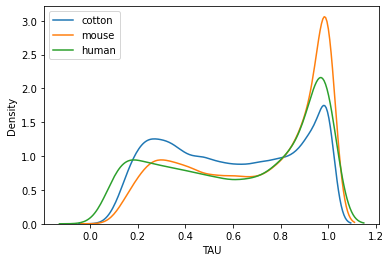

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/cotton_human_mouse_tau_new.txt", sep="\t")
df_cotton = df.query("TAU>=0.01 & species=='cotton'").copy()
df_mouse = df.query("species=='mouse'").copy()
df_human = df.query("species=='human'").copy()
sns.kdeplot(data=df_cotton["TAU"])
ax = sns.kdeplot(data=df_mouse['TAU'])
ax = sns.kdeplot(data=df_human['TAU'])
plt.legend(labels=['cotton', 'mouse', 'human'])
plt.savefig("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/cotton_human_mouse_tau.pdf", )

In [3]:
## 将fiber_5DPA + 9个组织，以及fiber_10DPA+9个组织获取其中TAU>=0.8
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
df_tpm = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_log_tpm.txt", sep="\t")
df_fiber_5DPA = df_tpm[['chr', 'start', 'end', 'GeneId', 'anthers',  'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA']].copy()
df_TAIR=pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_vs_Arabidopsis.txt", sep="\t", names=['GeneId', 'TAIRID'])
for index, row in df_fiber_5DPA.iterrows():
    n = 8 ## The number of tissues
    tissue_tpm = sorted(row[4:12])
    tau = n/(n-1) - sum(tissue_tpm)/((n-1)*max(tissue_tpm)) # Calculate the tau
    df_fiber_5DPA.loc[index, 'TAU'] = tau
df_fiber_5DPA['tags'] = df_fiber_5DPA[['anthers','leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA']].idxmax(axis=1)
df_fiber_5DPA = df_fiber_5DPA.query("tags=='fiber_5DPA' & TAU>=0.85")
df_fiber_5DPA = pd.merge(df_TAIR, df_fiber_5DPA, how='right', on=['GeneId'])
df_fiber_5DPA.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/fiber_5DPA_10DPA/J668_fiber_5DPA.txt', sep="\t", index=False)

In [6]:
## 将fiber_5DPA + 9个组织，以及fiber_10DPA+9个组织获取其中TAU>=0.85
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
df_tpm = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_log_tpm.txt", sep="\t")
df_fiber_5DPA = df_tpm[['chr', 'start', 'end', 'GeneId', 'anthers',  'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_10DPA']].copy()
df_TAIR=pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_vs_Arabidopsis.txt", sep="\t", names=['GeneId', 'TAIRID'])
for index, row in df_fiber_5DPA.iterrows():
    n = 8 ## The number of tissues
    tissue_tpm = sorted(row[4:12])
    tau = n/(n-1) - sum(tissue_tpm)/((n-1)*max(tissue_tpm)) # Calculate the tau
    df_fiber_5DPA.loc[index, 'TAU'] = tau
df_fiber_5DPA['tags'] = df_fiber_5DPA[['anthers','leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_10DPA']].idxmax(axis=1)
df_fiber_5DPA = df_fiber_5DPA.query("tags=='fiber_10DPA' & TAU>=0.99")
df_fiber_5DPA = pd.merge(df_TAIR, df_fiber_5DPA, how='right', on=['GeneId'])
df_fiber_5DPA.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/fiber_5DPA_10DPA/J668_fiber_10DPA.txt', sep="\t", index=False)

In [19]:
## 分析纤维发育过程中时期特异性高表达基因，并分析其Go term
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
df_tpm = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_log_tpm.txt", sep="\t")
#df_fiber_5DPA = df_tpm[['chr', 'start', 'end', 'GeneId',  'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']].copy()
df_fiber_5DPA = df_tpm.copy()
df_TAIR=pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_vs_Arabidopsis.txt", sep="\t", names=['GeneId', 'TAIRID'])
for index, row in df_fiber_5DPA.iterrows():
    n = 13 ## The number of tissues
    tissue_tpm = sorted(row[4:17])
    tau = n/(n-1) - sum(tissue_tpm)/((n-1)*max(tissue_tpm)) # Calculate the tau
    df_fiber_5DPA.loc[index, 'TAU'] = tau
#df_fiber_5DPA['tags'] = df_fiber_5DPA[[ 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']].idxmax(axis=1)
df_fiber_5DPA['tags'] = df_fiber_5DPA[[ 'anthers', 'cotyledon', 'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']].idxmax(axis=1)
# 10 DPA
# df_fiber_5DPA = df_fiber_5DPA.query("tags=='fiber_10DPA'& TAU>=0.4")
# df_result = pd.merge(df_TAIR, df_fiber_5DPA, how='right', on=['GeneId'])
# df_result.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/fiber_5DPA_10DPA/J668_fiber_10DPA.txt', sep="\t", index=False)
# 5 DPA
df_fiber_5DPA = df_fiber_5DPA.query("tags=='fiber_5DPA'& TAU>=0.4")
df_result = pd.merge(df_TAIR, df_fiber_5DPA, how='right', on=['GeneId'])
df_result.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/fiber_5DPA_10DPA/J668_fiber_5DPA.txt', sep="\t", index=False)

In [21]:
## 将所挑选出来的基因，计算其zscore，然后用于lemon聚类分析
df_fiber_5DPA = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/fiber_5DPA_10DPA/J668_fiber_5DPA.txt', sep="\t")
df_fiber_5DPA_id = df_fiber_5DPA[['GeneId']]
df_zscore = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Standard_deviation/J668_all_tissue_average_TPM_zscore.txt", sep="\t")
#df_zscore = df_zscore[['GeneId', 'anthers', 'cotyledon', 'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA']]
df_result = pd.merge(df_fiber_5DPA_id, df_zscore, how='inner', on=['GeneId'])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/fiber_5DPA_10DPA/J668_fiber_5DPA_zscore.bed", sep="\t", index=False)

In [6]:
# 将0DPA 和5DPA reads 合并
import pandas as pd
df_0DPA = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/ovules/ovules_reads.bed", sep="\t")
df_0DPA = df_0DPA[['GeneId', 'reads1', 'reads2']]
df_5DPA = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/fiber_5DPA/fiber_5DPA_reads.bed", sep="\t")
df_0DPA.columns = ['GeneId', 'CT1', 'CT2']
df_5DPA.columns = ['GeneId', 'KD1', 'KD2']
df_result = pd.merge(df_0DPA, df_5DPA, how='left', on=['GeneId'])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/0DPA_vs_5DPA/0DPA_5DPA_reads.bed", sep="\t", index=False)

In [49]:
## 根据DESeq2 (0DPA vs 5DPA)所分析出的结果来找到5DPA 时期高表达的基因
import pandas as pd
df_DEG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/0DPA_vs_5DPA/0DPA_5DPA_DEG.bed", sep="\t")
df_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM.txt", sep="\t")
df_TAIR = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_vs_Arabidopsis.txt", names=['GeneId', 'TAIRID'], sep="\t")

df_DEG_5DPA = df_DEG.query("sig=='Up'")[['GeneId']].copy()
print(df_DEG_5DPA.shape[0])
df_5DPA_TPM = pd.merge(df_DEG_5DPA, df_TPM, how='left', on=['GeneId'])
df_5DPA_exp_TPM = df_5DPA_TPM.query("fiber_5DPA>=0.5")[['GeneId']].copy()
df_5DPA_TAIR = pd.merge(df_5DPA_exp_TPM, df_TAIR, how='left', on=['GeneId'])
#df_5DPA_TAIR.dropna(inplace=True)
df_5DPA_TAIR.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/0DPA_vs_5DPA/5DPA_high_TAIR.bed", sep="\t", index=False)


## 5DPA 上调基因在所有组织中的表达量
df_TPM_long = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM_long.txt", sep="\t")
df_5DPA_TPM2 = pd.merge(df_5DPA_TPM, df_TPM_long, how='left', on=['GeneId'])
df_5DPA_TPM2.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/0DPA_vs_5DPA/5DPA_up_all_tissue_TPM.bed", sep="\t", index=False)


## 5DPA 上调表达基因与TAU 所鉴定的组织特异高表达基因的overlap
df_tau = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_tissue_special_gene.txt", sep="\t")
df_tau_5DPA = df_tau.query("tags=='fiber_5DPA'")[['GeneId']]
df_overlap = pd.merge(df_5DPA_TAIR, df_tau_5DPA, how='inner', on=['GeneId'])
df_overlap.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/0DPA_vs_5DPA/5DPA_up_tau_overlap_TAIR.bed", sep="\t", index=False)

9852


In [4]:
# 将5DPA 和10DPA reads 合并
import pandas as pd
df_5DPA = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/fiber_5DPA/fiber_5DPA_reads.bed", sep="\t")
df_10DPA = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/fiber_10DPA/fiber_10DPA_reads.bed", sep="\t")
df_5DPA.columns = ['GeneId', 'DPA5_rep1', 'DPA5_rep2']
df_10DPA.columns = ['GeneId', 'DPA10_rep1', 'DPA10_rep2']
df_result = pd.merge(df_5DPA, df_10DPA, how='left', on=['GeneId'])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/5DPA_10DPA_reads.bed", sep="\t", index=False)

In [9]:
# 将10DPA 和20DPA reads 合并
import pandas as pd
df_10DPA = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/fiber_10DPA/fiber_10DPA_reads.bed", sep="\t")
df_20DPA = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/fiber_20DPA/fiber_20DPA_reads.bed", sep="\t")
df_10DPA.columns = ['GeneId', 'CT1', 'CT2']
df_20DPA.columns = ['GeneId', 'DT1', 'DT2']
df_result = pd.merge(df_10DPA, df_20DPA, how='left', on=['GeneId'])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/10DPA_vs_20DPA/10DPA_20DPA_reads.bed", sep="\t", index=False)

In [48]:
## 根据DESeq2 (10DPA vs 20DPA)所分析出的结果来找到20DPA 时期高表达的基因
import pandas as pd
df_DEG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/10DPA_vs_20DPA/10DPA_20DPA_DEG.bed", sep="\t")
df_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM.txt", sep="\t")
df_TAIR = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_vs_Arabidopsis.txt", names=['GeneId', 'TAIRID'], sep="\t")

df_DEG_20DPA = df_DEG.query("sig=='Up'")[['GeneId']].copy()
print(df_DEG_20DPA.shape[0])
df_20DPA_TPM = pd.merge(df_DEG_20DPA, df_TPM, how='left', on=['GeneId'])
df_20DPA_exp_TPM = df_20DPA_TPM.query("fiber_20DPA>=0.5")[['GeneId']].copy()
df_20DPA_TAIR = pd.merge(df_20DPA_exp_TPM, df_TAIR, how='left', on=['GeneId'])
#df_20DPA_TAIR.dropna(inplace=True)
df_20DPA_TAIR.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/10DPA_vs_20DPA/20DPA_high_TAIR.bed", sep="\t", index=False)

## 20DPA 上调基因在所有组织中的表达量
df_TPM_long = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM_long.txt", sep="\t")
df_20DPA_TPM2 = pd.merge(df_20DPA_TPM, df_TPM_long, how='left', on=['GeneId'])
df_20DPA_TPM2.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/10DPA_vs_20DPA/20DPA_up_all_tissue_TPM.bed", sep="\t", index=False)

## 20DPA 上调表达基因与TAU 所鉴定的组织特异高表达基因的overlap
df_tau = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_tissue_special_gene.txt", sep="\t")
df_tau_20DPA = df_tau.query("tags=='fiber_20DPA'")[['GeneId']]
df_overlap = pd.merge(df_20DPA_TAIR, df_tau_20DPA, how='inner', on=['GeneId'])
df_overlap.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/10DPA_vs_20DPA/20DPA_up_tau_overlap_TAIR.bed", sep="\t", index=False)

7135


In [47]:
## 根据DESeq2 (5DPA vs 10DPA)所分析出的结果来找到5DPA 时期高表达的基因
import pandas as pd
df_DEG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/5DPA_10DPA_DEG.bed", sep="\t")
df_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM.txt", sep="\t")
df_TAIR = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_vs_Arabidopsis.txt", names=['GeneId', 'TAIRID'], sep="\t")

df_DEG_5DPA = df_DEG.query("sig=='Down'")[['GeneId']].copy()
df_5DPA_TPM = pd.merge(df_DEG_5DPA, df_TPM, how='left', on=['GeneId'])
df_5DPA_exp_TPM = df_5DPA_TPM.query("fiber_5DPA>=0.5")[['GeneId']].copy()
df_5DPA_TAIR = pd.merge(df_5DPA_exp_TPM, df_TAIR, how='left', on=['GeneId'])
df_5DPA_TAIR.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/5DPA_high_TAIR.bed", sep="\t", index=False)

df_DEG_10DPA = df_DEG.query("sig=='Up'")[['GeneId']].copy()
print(df_DEG_10DPA.shape[0])
df_10DPA_TPM = pd.merge(df_DEG_10DPA, df_TPM, how='left', on=['GeneId'])
#print(df_10DPA_TPM)
df_10DPA_exp_TPM = df_10DPA_TPM.query("fiber_10DPA>=0.5")[['GeneId']].copy()
df_10DPA_TAIR = pd.merge(df_10DPA_exp_TPM, df_TAIR, how='left', on=['GeneId'])
#df_10DPA_TAIR.dropna(inplace=True)
df_10DPA_TAIR.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/10DPA_high_TAIR.bed", sep="\t", index=False)

## 10DPA 上调基因在所有组织中的表达量
df_TPM_long = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM_long.txt", sep="\t")
df_10DPA_TPM2 = pd.merge(df_10DPA_TPM, df_TPM_long, how='left', on=['GeneId'])
df_10DPA_TPM2.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/10DPA_up_all_tissue_TPM.bed", sep="\t", index=False)

## 10DPA 上调表达基因与TAU 所鉴定的组织特异高表达基因的overlap
df_tau = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_tissue_special_gene.txt", sep="\t")
df_tau_10DPA = df_tau.query("tags=='fiber_10DPA'")[['GeneId']]
df_overlap = pd.merge(df_10DPA_TAIR, df_tau_10DPA, how='inner', on=['GeneId'])
df_overlap.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/10DPA_up_tau_overlap_TAIR.bed", sep="\t", index=False)


4993


In [53]:
df_5DPA_up = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/0DPA_vs_5DPA/5DPA_high_TAIR.bed", sep="\t")
df_5DPA_down = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/5DPA_high_TAIR.bed", sep="\t")
df = pd.merge(df_5DPA_up, df_5DPA_down, how='inner')
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/5DPA_up_down_TAIR.bed", sep="\t", index=False)

In [12]:
## 根据DESeq2 (5DPA vs 20DPA)所分析出的结果来找到5DPA 时期高表达的基因, 并且与 5DPA vs 10DPA 中的结果取合集
import pandas as pd
df_DEG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_20DPA/5DPA_20DPA_DEG.bed", sep="\t")
df_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM.txt", sep="\t")
df_TAIR = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_vs_Arabidopsis.txt", names=['GeneId', 'TAIRID'], sep="\t")
df_DEG_5DPA = df_DEG.query("sig=='Down'")[['GeneId']].copy()
df_5DPA_TPM = pd.merge(df_DEG_5DPA, df_TPM, how='left', on=['GeneId'])
df_5DPA_exp_TPM = df_5DPA_TPM.query("fiber_5DPA>=0.5")[['GeneId']].copy()
##与 5DPA vs 10DPA 中 5DPA 高表达基因结果取合集
df_5DPA_high_10DPA = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/5DPA_high_TAIR.bed", sep="\t")
df_5DPA_high_10DPA_gene = df_5DPA_high_10DPA[['GeneId']]
df_5DPA_uniq = pd.merge(df_5DPA_high_10DPA_gene, df_5DPA_exp_TPM, how='outer', on=['GeneId'])
df_5DPA_TAIR = pd.merge(df_5DPA_uniq, df_TAIR, how='left', on=['GeneId'])
df_5DPA_TAIR.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_20DPA/5DPA_high_uniq.bed", sep="\t", index=False)

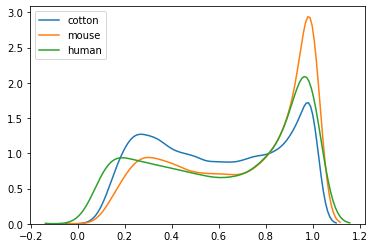

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/cotton_human_mouse_tau.txt", sep="\t")
df_cotton = df.query("TAU>=0.01 & species=='cotton'").copy()
df_mouse = df.query("species=='mouse'").copy()
df_human = df.query("species=='human'").copy()
sns.kdeplot(data=df_cotton["TAU"])
ax = sns.kdeplot(data=df_mouse['TAU'])
ax = sns.kdeplot(data=df_human['TAU'])
plt.legend(labels=['cotton', 'mouse', 'human'])
plt.savefig("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/cotton_human_mouse_tau.pdf", )

In [40]:
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_tau.txt", sep="\t")
df_tissue = df.query("TAU>=0.85")
print(df_tissue.shape[0])

14953


In [2]:
## 选出TAU>=0.85 的基因选出，并zscore标准化，之后用umap 降维聚类处理
import pandas as pd
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
df_TAU = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_tau.txt", sep="\t")
df_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM.txt", sep="\t")
df_zscore = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Standard_deviation/J668_all_tissue_average_TPM_zscore.txt", sep="\t")
tissues = ['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']
#* choose tissue special gene (TAU>=0.85)
df_TAU_tissue = df_TAU.query("TAU>=0.85")[['GeneId']].copy()
df_tissue_zscore = pd.merge(df_TAU_tissue, df_zscore, how='left', on=['GeneId'])
#df_tissue_TPM = pd.merge(df_TAU_tissue, df_TPM, how='left', on=['GeneId'])
df_tissue_TPM = pd.merge(df_TAU_tissue, df_tissue_zscore, how='left', on=['GeneId'])
max_tag = df_tissue_TPM[tissues].idxmax(axis=1)
df_tissue_TPM['max_tpm'] = max_tag
#* standard by umap
reducer = umap.UMAP()
# #data = df_tissue_zscore[['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']]#
# #df_TAU_tissue = df_TAU.query("TAU>=0.85")
data = df_tissue_TPM[['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']]
# #print(data)
scaled_penguin_data = StandardScaler().fit_transform(data)
embedding = reducer.fit_transform(scaled_penguin_data)
df_umap = pd.DataFrame(embedding, columns =['umap1', 'umap2'])
df_result = pd.concat([df_tissue_TPM, df_umap], axis = 1)
#df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/umap/J668_TAU_umap.bed", sep="\t", index=False)
#df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/umap/J668_TAU_umap_zscore.bed", sep="\t", index=False)

In [5]:
tissues = ['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petal', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/compartment/CALDER2/adjust_direact/{}_cpt_adjust.bed".format(t)
    df = pd.read_csv(input_f, sep=" ")
    df.to_csv(input_f, sep="\t" , index=False)


In [1]:
# 将组织特异性基因选出，并绘制热图
import pandas as pd
import numpy as np
df_TAU = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_tau.txt", sep="\t")
df_zscore = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Standard_deviation/J668_all_tissue_average_TPM_zscore.txt", sep="\t")
tissues = ['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']
df_special_gene = df_TAU.query("TAU>=0.85")[['GeneId']].copy()
df_special_zscore = pd.merge(df_special_gene, df_zscore, how='left', on='GeneId')
df_special_zscore['tags'] = df_special_zscore[tissues].idxmax(axis=1)

## 将值调整为-1到1之间，方便作图配色及比较
df_tissues_normal = pd.DataFrame(columns = ['GeneId', 'anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA', 'tags'])
def Normalization2(x):
    return [(float(i)-np.mean(x))/(max(x)-min(x)) for i in x]
for index, row in df_special_zscore.iterrows():
    data = row[tissues]
    geneid , tags = [row['GeneId']], [row['tags']]
    #print(data)
    data_normal = Normalization2(data)
    row_new = geneid + data_normal + tags
    df_tissues_normal.loc[index,] = row_new
for t in tissues:
    #df_tissues = df_special_zscore.query("tags==@t")
    df_tissues = df_tissues_normal.query("tags==@t")
    print(t, df_tissues.shape[0])
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_zscore/{}_zscore_normal.bed".format(t)
    df_tissues.to_csv(output_f, sep="\t", index=False, columns=['GeneId', 'anthers', 'leaf', 'hypocotyl', 'cotyledon',  'stem', 'ovules', 'root', 'radicle',  'fiber_20DPA', 'fiber_5DPA', 'fiber_10DPA',  'petals', 'stigma'])

anthers 2964
cotyledon 932
ovules 2524
hypocotyl 707
leaf 917
petals 655
radicle 1658
root 1924
stem 572
stigma 737
fiber_5DPA 474
fiber_10DPA 374
fiber_20DPA 515


In [2]:
# 组织特异性基因(TAU>=0.85)的TPM
import pandas as pd
df_tau = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_tau.txt", sep="\t")
df_tpm = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM.txt", sep="\t")
df_tissue_gene = df_tau.query("TAU>=0.85")[['chr', 'start', 'end', 'GeneId']]
df_tissue_tpm = pd.merge(df_tissue_gene, df_tpm, how='left', on=['GeneId'])
tissues = ['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']
df_tissue_tpm['tags'] = df_tissue_tpm[tissues].idxmax(axis=1)
df_tissue_tpm.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_tissue_special_gene.txt", sep="\t", index=False)

In [4]:
## 给所有基因打上TAU最大值的特定组织标签
import pandas as pd
df_tau = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_tau.txt", sep="\t")
tissues = ['Anther', 'Cotyledon', 'Ovule',  'Hypocotyl', 'Leaf', 'Petal', 'Radicle', 'Root', 'Stem', 'Stigma', 'Fiber_5DPA', 'Fiber_10DPA', 'Fiber_20DPA']
df_tau['TAU_Tags'] = df_tau[tissues].idxmax(axis=1)
df_tau.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_tau_tags.txt", sep="\t", index=False)

In [40]:
# 分析组织特异性基因是否偏好bias表达
import pandas as pd
df_TSG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_tissue_special_gene.txt", sep="\t")
df_bias = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/gene_bias/all_tissue_bias_gene_pair.bed", sep="\t")
df_hg_pair = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/all_homo_gene_pairs_position.txt", sep="\t")
df_hg_pair.drop_duplicates(keep='first', inplace=True, subset=['geneid_dt'])
tissues = ['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']
for t in tissues:
    df_TSG_tissues = df_TSG.query("tags==@t")[['GeneId']].copy()
    df_bias_tissues = df_bias.query("tags==@t").copy()
    # 分析组织特异性表达的基因包含多少同源基因对
    df_TSG_tissues.columns = ['geneid_at']
    #print(df_TSG_tissues.shape[0])
    df_a1 = pd.merge(df_TSG_tissues, df_hg_pair, how='left', on=['geneid_at'])
    df_TSG_tissues.columns = ['geneid_dt']
    df_d1 = pd.merge(df_TSG_tissues, df_hg_pair, how='inner', on=['geneid_dt'])
    df_ab1 = pd.concat([df_a1, df_d1], axis=0)
    df_ab1.drop_duplicates(keep='first', inplace=True)
    #print(df_ab1.shape[0])
    # 分析有多少组织特异性表达的同源基因对 具有表达bias
    df_TSG_tissues.columns = ['geneid_at']
    df_a = pd.merge(df_bias_tissues, df_TSG_tissues, how='inner', on=['geneid_at'])
    df_TSG_tissues.columns = ['geneid_dt']
    df_d = pd.merge(df_bias_tissues, df_TSG_tissues, how='inner', on=['geneid_dt'])
    df_ab = pd.concat([df_a, df_d], axis=0)
    df_ab.drop_duplicates(keep='first', inplace=True)
    # print(df_ab.shape[0], df_TSG_tissues.shape[0], df_bias_tissues.shape[0], 25293)
    # print(df_ab.shape[0]/((df_TSG_tissues.shape[0])/2), df_ab.shape[0]/df_bias_tissues.shape[0], df_bias_tissues.shape[0]/25293)
    print(df_ab.shape[0]/df_ab1.shape[0], df_bias_tissues.shape[0]/25293)

0.1952770208900999 0.24931799312062625
0.22559852670349909 0.22350057328114498
0.1695886716115981 0.18653382358755388
0.21993127147766323 0.20258569564701695
0.22554347826086957 0.21069070493812517
0.3096129837702871 0.2697584311864943
0.14606741573033707 0.15055548966117108
0.21511627906976744 0.20748823785237022
0.21112696148359486 0.2123117067963468
0.3153252480705623 0.25924168742339776
0.16610169491525423 0.10663029296643341
0.25213675213675213 0.19013165698019216
0.2476489028213166 0.1923457082987388


In [6]:
## 将组织特异性基因中同源高表达基因写到文件中, 包含Bias 基因ID， 拟南芥ID， bias类型，特异性表达组织
import pandas as pd
df_TSG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_tissue_special_gene.txt", sep="\t")
df_bias = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/gene_bias/all_tissue_bias_gene_pair.bed", sep="\t")
tissues = ['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']
df_hg_tair = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_vs_Arabidopsis.txt", sep="\t", names = ['GeneId', 'TAIRID'])
df_result = pd.DataFrame()
for t in tissues:
    df_TSG_tissues = df_TSG.query("tags==@t")[['GeneId']].copy()
    df_bias_tissues = df_bias.query("tags==@t").copy()
    # 分析有多少组织特异性表达的同源基因对 具有表达bias
    df_TSG_tissues.columns = ['geneid_at']
    df_a = pd.merge(df_bias_tissues, df_TSG_tissues, how='inner', on=['geneid_at'])
    df_TSG_tissues.columns = ['geneid_dt']
    df_d = pd.merge(df_bias_tissues, df_TSG_tissues, how='inner', on=['geneid_dt'])
    df_ab = pd.concat([df_a, df_d], axis=0)
    df_ab.drop_duplicates(keep='first', inplace=True)
    # 将同源bias基因高表达选出
    df_biasA = df_ab.query("sig=='BiasA'")[['geneid_at', 'sig', 'tags']].copy()
    df_biasD = df_ab.query("sig=='BiasD'")[['geneid_at', 'sig', 'tags']].copy()
    # 找到对应的拟南芥ID
    df_biasA.columns = ['GeneId', 'bias', 'tissue']
    df_biasD.columns = ['GeneId', 'bias', 'tissue']
    df_biasA = pd.merge(df_hg_tair, df_biasA, how='inner', on=['GeneId'])
    df_biasD = pd.merge(df_hg_tair, df_biasD, how='inner', on=['GeneId'])
    df_result = pd.concat([df_result, df_biasA, df_biasD], axis=0)
    df_result.dropna(inplace=True)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/At_Dt_bias/TSG_hig_bias_tair.bed", sep='\t', index=False)



In [10]:
# 对于组织特异性表达基因找到对应的拟南芥基因ID
import pandas as pd
df_tau  = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_tissue_special_gene.txt', sep="\t")
df_tair = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_vs_Arabidopsis.txt', sep="\t", names=['GeneId', 'TAIR_ID'])
df_result = pd.merge(df_tau, df_tair, how='left', on='GeneId')
df_result.dropna(inplace=True)
tissues = ['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'fiber_5DPA', 'fiber_10DPA', 'fiber_20DPA']
for t in tissues:
    output_f     = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go_funset/{}_funset.bed".format(t)
    df_tissues   = df_result.query("tags==@t")[['TAIR_ID']].copy()
    df_tissues_T = df_tissues.T
    df_tissues_T.to_csv(output_f, sep=',', index=False, header=False)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/TSG_TAIRID.bed", sep='\t', columns=['GeneId', 'TAIR_ID', 'tags'], index=False)

In [14]:
## 将TAU>=0.85的基因，用特征基因在特征组织中的表达高于其它所有组织两倍以上来筛选petal的特征基因
df_TSG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/TSG_TAIRID.bed", sep="\t")
df_2fc = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tissue_uniq_exp_gene/all_tissue_expgene_ge_2_Atid.txt", sep="\t")
df_TSG_tissue = df_TSG.query("tags=='petals'").copy()
df_2fc_tissue = df_2fc.query("second_idx=='petals'")[['GeneId']].copy()
df_petal_TSG_2FC = pd.merge(df_TSG_tissue, df_2fc_tissue, how='left')
print(df_TSG_tissue.shape[0], df_2fc_tissue.shape[0], df_petal_TSG_2FC.shape[0])

578 2719 578


In [25]:
## 将Go term转换为所需要的文件格式
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Go_annotation/HZAU_TM-1_GO_list.txt", sep='\t', names=['geneid', 'go'])
df_result = pd.DataFrame(columns=['geneid', 'go'])
for index , row in df.iterrows():
    go_list = row['go'].split(',')
    geneid_list = [row['geneid']]*len(go_list)
    df_tmp = pd.DataFrame({'geneid':geneid_list, 'go':go_list})
    df_result = pd.concat([df_result, df_tmp], axis=0)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Go_annotation/Ghir_Go.annot", sep="\t", index=False)

In [9]:
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/petal_ljy/petal_BP_go.bed", sep="\t", names=['Go','Enrich', 'Ontology', ' Description', 'Number', 'p-value', 'Genes', 'FDR'])
df_choose = df.query("FDR<=0.05")
df_choose.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/petal_ljy/petal_BP_GO_0.05.bed", sep="\t", index=False)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [16]:
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/fiber_5DPA_10DPA/fiber_5DPA_BP.bed", sep="\t", names=['Go','Enrich', 'Ontology', ' Description', 'Number', 'p-value', 'Genes', 'FDR'])
df_choose = df.query("FDR<=0.05")
df_choose.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/fiber_5DPA_10DPA/fiber_5DPA_BP_GO_0.05.bed", sep="\t", index=False)

In [15]:
## 将纤维的Go terms数据合并起来
import pandas as pd
df_0DPA = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/ovules_GO.bed", sep="\t")
df_5DPA = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/0DPA_vs_5DPA/5DPA_high_Go.bed", sep="\t")
df_10DPA = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/10DPA_high_Go.bed", sep="\t")
df_20DPA = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/10DPA_vs_20DPA/20DPA_high_Go.bed", sep="\t")

df_0DPA['tags'] = ['0DPA']*df_0DPA.shape[0]
df_5DPA['tags'] = ['5DPA']*df_5DPA.shape[0]
df_10DPA['tags'] = ['10DPA']*df_10DPA.shape[0]
df_20DPA['tags'] = ['20DPA']*df_20DPA.shape[0]
df = pd.concat([df_0DPA, df_5DPA, df_10DPA, df_20DPA], ignore_index=True)
df.drop_duplicates(keep='first', subset=['ID'])
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/0DPA_5DPA_10DPA_20DPA/fiber_development_DPA.bed", sep="\t", index=False)

In [50]:
# 对Fiber_0DPA 5DPA 10DPA 和20DPA 的数据 matrix 转变为网络
## 从Go term 到networkx
#! 1、用GOSemSim 来分析Go term 的相似性 并用simpleEnrichment来聚类
#! 2、用相似性程度作为权重，构造互作网络
#! 3、构建节点的描述信息

#! 2 将矩阵转换为网络格式
def matrix_To_net(df1, df2):
    id_list = df2['ID'].tolist()
    df_return = pd.DataFrame(columns=['source', 'target', 'weight'])
    list_len = len(id_list)
    for i in range(list_len):
        for j in range(i+1, list_len ):
            s = id_list[i]
            t = id_list[j]
            w = df1.loc[s, t]
            df_return.loc[df_return.shape[0]] = [s, t, w]
    df_return = df_return.query("weight>=0.1").copy()
    df_return['Type'] = ['Undirected']*df_return.shape[0]
    return df_return

## 添加节点描述信息
def node_descriptions(df1, df2):
    df2 = df2[['ID', 'Description']].copy()
    df2.drop_duplicates(keep='first', subset=['ID'], inplace=True)
    df_5DPA = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/0DPA_vs_5DPA/5DPA_high_Go.bed', sep="\t")
    df_10DPA = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/10DPA_high_Go.bed', sep="\t")
    df_20DPA = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/10DPA_vs_20DPA/20DPA_high_Go.bed', sep="\t")
    df_5DPA = df_5DPA[['ID']].copy()
    df_10DPA = df_10DPA[['ID']].copy()
    df_20DPA = df_20DPA[['ID']].copy()
    df_5DPA['DPA5'], df_10DPA['DPA10'], df_20DPA['DPA20'] = ['Yes']*df_5DPA.shape[0], ['Yes']*df_10DPA.shape[0], ['Yes']*df_20DPA.shape[0]
    df1 = pd.merge(df1, df_5DPA, how='left', on=['ID'])
    df1 = pd.merge(df1, df_10DPA, how='left', on=['ID'])
    df1 = pd.merge(df1, df_20DPA, how='left', on=['ID'])
    df1.fillna("No", inplace=True)
    df_return = pd.merge(df1, df2, how='left', on=['ID'])
    print(df_return.shape[0])
    return df_return

## 给出每个簇前三个最具有代表性的 Go_terms
# df1 表示节点描述信息
# df2 表示Go terms 相似矩阵
# N 表示需要对多少个cliques 进行分析
def std_top3(df1, df2, N):
    df_return = pd.DataFrame()
    df_tmp2 = pd.DataFrame()
    #print(df2.head())

    for i in range(N):
        j = i+1 # 类是从1 开始
        go_id = df2.query("cluster==@j")['ID'].tolist()
        df_cluster_sim = df1.loc[go_id, go_id].copy()
        df_cluster_sim['std'] = df_cluster_sim.std(axis=1)
        df_cluster_sim.reset_index(drop=False, inplace=True)
        df_cluster_sim.sort_values(by=['std'], inplace=True)
        # 选择标准差最小的三个Go terms
        
        df_std_top3 = df_cluster_sim.tail(N)[['index']].copy()
        df_std_top3.columns = ['ID']
        # print(df_std_top3)
        # print(df2)
        df_tmp = pd.merge(df_std_top3, df2, how='left', on=['ID'])
        df_tmp['cluster'] = [j]*df_tmp.shape[0]
        #print(df_tmp)
        df_return = pd.concat([df_return, df_tmp], axis=0)
        ## 给结点打上std 标签
        df_cluster_sim = df_cluster_sim[['index', 'std']]
        if df_tmp2.shape[0] == 0:
            df_tmp2 = df_cluster_sim.copy()
        else:
            df_tmp2 = pd.concat([df_tmp2, df_cluster_sim], axis=0)
    df_tmp2 = df_tmp2[['index', 'std']]
    df_tmp2.columns = ['ID', 'std']
    df2 = pd.merge(df2, df_tmp2, how='left', on=['ID'])
    df2.sort_values(by=['cluster', 'std'], ascending=(True, False), inplace=True)
    #print(df2)
    return df2, df_return   


# BF 1 min
df_GoCluster  = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/0DPA_5DPA_10DPA_20DPA/fiber_development_DPA_cluster.bed", sep="\t")
df_GoSimilar  = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/0DPA_5DPA_10DPA_20DPA/fiber_development_DPA_similar.csv", index_col=0)
df_GoDescript = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/0DPA_5DPA_10DPA_20DPA/fiber_development_DPA.bed", sep='\t')

# Go term 相似性网络
#df_net   = matrix_To_net(df_GoSimilar, df_GoCluster)
df_node  = node_descriptions(df_GoCluster, df_GoDescript)
df_node, df_Tnode = std_top3(df_GoSimilar, df_node, 17)
#df_net.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/0DPA_5DPA_10DPA_20DPA/Gh_fiber_Development_net.csv', index=False)
df_node.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/0DPA_5DPA_10DPA_20DPA/Gh_fiber_Development_node.csv', index=False)
df_Tnode.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/tissues_Go/0DPA_5DPA_10DPA_20DPA/Gh_fiber_Development_Tnode.csv', index=False)

222


In [62]:
# BF 1 min
df_GoCluster  = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/0DPA_vs_5DPA/5DPA_high_cluster.bed", sep="\t")
df_GoSimilar  = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/0DPA_vs_5DPA/5DPA_high_similar.csv", index_col=0)
df_GoDescript = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/0DPA_vs_5DPA/5DPA_high_Go.bed", sep='\t')

# Go term 相似性网络
df_net   = matrix_To_net(df_GoSimilar, df_GoCluster)
df_node  = node_descriptions(df_GoCluster, df_GoDescript)
df_node, df_Tnode = std_top3(df_GoSimilar, df_node, 12)
df_net.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/0DPA_vs_5DPA/5DPA_high_net.csv', index=False)
df_node.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/0DPA_vs_5DPA/5DPA_high_node.csv', index=False)
df_Tnode.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/0DPA_vs_5DPA/5DPA_high_Tnode.csv', index=False)

51


In [66]:
# BF 1 min
df_GoCluster  = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/10DPA_high_cluster.bed", sep="\t")
df_GoSimilar  = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/10DPA_high_similar.csv", index_col=0)
df_GoDescript = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/10DPA_high_Go.bed", sep='\t')

# Go term 相似性网络
df_net   = matrix_To_net(df_GoSimilar, df_GoCluster)
df_node  = node_descriptions(df_GoCluster, df_GoDescript)
df_node, df_Tnode = std_top3(df_GoSimilar, df_node, 12)
df_net.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/10DPA_high_net.csv', index=False)
df_node.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/10DPA_high_node.csv', index=False)
df_Tnode.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/5DPA_high_Tnode.csv', index=False)

39


In [32]:
# 将clusterprofiler 所生成文件转换为作图文件格式
def trans_cluster(df):
    df = df.query("ONTOLOGY=='BP'").copy()
    df['bioprocess'] = df['Description'] + " (" + df['ID'] + ")"
    df[['gene_number', 'all_number']] = df['GeneRatio'].str.split("/", expand = True)
    df_return = df[['bioprocess', 'gene_number', 'qvalue']]
    df_return.columns = ['bioprocess', 'gene_number', 'FDR']
    return df_return
df_5DPA = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/0DPA_vs_5DPA/5DPA_high_Go.bed", sep="\t")
df_5DPA_adjust = trans_cluster(df_5DPA)
df_5DPA_adjust.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/0DPA_vs_5DPA/5DPA_high_Go_adjust.bed", sep="\t", index=False)

In [33]:
df_10DPA = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/10DPA_high_Go.bed", sep="\t")
df_10DPA_adjust = trans_cluster(df_10DPA)
df_10DPA_adjust.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/5DPA_vs_10DPA/10DPA_high_Go_adjust.bed", sep="\t", index=False)

In [34]:
# 20 DPA 相比10DPA 高表达基因
df_20DPA = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/10DPA_vs_20DPA/20DPA_high_Go.bed", sep="\t")
df_20DPA_adjust = trans_cluster(df_20DPA)
df_20DPA_adjust.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/10DPA_vs_20DPA/20DPA_high_Go_adjust.bed", sep="\t", index=False)

In [42]:
# 20DPA 相比10DPA 高表达基因 同时与组织特异表达基因间的overlap 
df_20DPA = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/10DPA_vs_20DPA/20DPA_up_tau_overlap_TAIR_GO.bed", sep="\t")
df_20DPA_adjust = trans_cluster(df_20DPA)
df_20DPA_adjust.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/10DPA_vs_20DPA/20DPA_up_tau_overlap_TAIR_adjust.bed", sep="\t", index=False)

In [6]:
# 将reads 数据合并
tissues = ['anthers', 'cotyledon', 'ovules',  'hypocotyl', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma']
df_result = pd.DataFrame()
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/{0}/{0}_reads.bed".format(t)
    df_tmp = pd.read_csv(input_f, sep="\t")
    r1, r2, r3 = "{}1".format(t), "{}2".format(t), "{}3".format(t)
    df_tmp.columns = ['GeneId', r1, r2, r3]
    if df_result.shape[0] == 0:
        df_result = df_tmp.copy()
    else:
        df_result = pd.merge(df_result, df_tmp, how='inner', on=['GeneId'])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/reads/all_tissues_reads.bed", sep="\t", index=False)

In [ ]:
import taichi as ti
ti.init()
@ti.func
def fc(n:int):
    for i in range(n):
        print(i)
    return n
@ti.kernel
def fz(h:int):
    h = 0
    for i in range(n):
        h += i
    #return h
fz(1000000000)

In [4]:
## 统计分析基因能在多少个组织中表达
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM.csv", index_col=0)
df[df>=0.5] = 1
df[df<=0.5] = 0
df['sum'] = df.sum(axis=1)
df['number'] = [1]*df.shape[0]
df_result = df.groupby(by=['sum'], as_index=False)['number'].sum()
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/Number_Tissue_Gene.csv", index=False)

In [5]:
## 分析多组织基因的表达水平
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM.csv", index_col=0)
df_mean = df.copy()
df_mean['average'] = df_mean.mean(axis=1)
df_mean.reset_index(inplace=True)
df_mean = df_mean[['GeneId', 'average']].copy()
df[df>=0.5] = 1
df[df<=0.5] = 0
df['sum'] = df.sum(axis=1)
df.reset_index(inplace=True)
df['number'] = [1]*df.shape[0]
df_tmp = df.groupby(by=['GeneId', 'sum'], as_index=False)['number'].sum()
df_result = pd.merge(df_mean, df_tmp, how='inner', on=['GeneId'])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/Expression_Tissue_Gene.csv", index=False)

In [24]:
## 分析，WGCNA 间的互作强度与Hi-C的互作强度联系
import pandas as pd
df_WGCNA = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/WGCNA/J668_all_tissue_005.edges.txt", sep="\t")
df_HiC = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/WGCNA/WGCNA_HiC/Gh_3K_GG_strenght.bed", sep="\t")
df_WGCNA.columns = ['G1', 'G2', 'WGCNA']
df_HiC = df_HiC[['G1', 'G2', 'strength']].copy()
df_HiC.columns = ['G1', 'G2', 'HiC']
df_a = pd.merge(df_HiC, df_WGCNA, how='inner', on=['G1', 'G2'])
print(df_a.shape[0])


40339


In [25]:
df_b = df_HiC.sample(40339)
df_b.reset_index(drop=True, inplace=True)
df_a = df_a[['HiC']].copy()
df_a.columns = ['WGCNA']
df_b = df_b[['HiC']].copy()
df_b.columns = ['random']
df_result = pd.concat([df_a, df_b], axis=1)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/WGCNA/WGCNA_HiC/HiC_WGCNA.bed", index=False)


In [10]:
## 分析组织特异表达基因之间的互作强度是否会高于随机选择的互作强度
import pandas as pd
df_GG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/WGCNA/WGCNA_HiC/Gh_3K_GG_strenght.bed", sep="\t")
df_TSG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/J668_tissue_special_gene_long.bed", sep="\t")


In [16]:
# df_TSG = df_TSG.query("special_tissues=='anthers' & tissues=='anthers'")[['GeneId']].copy()
# df_TSG.columns = ['G1']
# df_a = pd.merge(df_GG, df_TSG, how='inner', on=['G1'])
# df_TSG.columns = ['G2']
# df_b = pd.merge(df_a, df_TSG, how='inner', on=['G2'])
# df_result1 = df_GG.sample(21320)[['strength']].copy()
# df_result2 = df_b[['strength']].copy()

# df_result1.columns = ['TSG']
# df_result2.columns = ['random']
df_result1.reset_index(drop=True, inplace=True)
df_result2.reset_index(drop=True, inplace=True)
df_result = pd.concat([df_result1, df_result2], axis=1)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/tau_gini/HiC_concat/anther_TSG_concat.csv", index=False)

In [ ]:
## 对基因表达量 按照 行来zsore 并归一化到-1到1 之间
import pandas as pd
import scipy.stats as stats
import numpy as np
tissues = ['Anther', 'Cotyledon', 'Ovule', 'Hypocotyl', 'Leaf', 'Petal', 'Radicle', 'Root', 'Stem', 'Stigma', 'Fibre_10DPA', 'Fibre_20DPA']
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM.txt", sep="\t")
df_tissues = df[tissues].copy()
geneid = df['GeneId'].to_list()
# zscore
df_numpy = df_tissues.to_numpy()
df_zscore = stats.zscore(df_numpy, axis=1)
df = pd.DataFrame(df_zscore, index=geneid, columns=tissues)
df.dropna(inplace=True, how='all')
df.fillna(0, inplace=True)
# 归一化
geneid = df.index.to_list()
df_result = pd.DataFrame(index=geneid, columns=tissues)
def Normalization2(x): # 数据归一化
    return [(float(i)-np.mean(x))/(max(x)-min(x)) for i in x]
#print(df.head())
for index, row in df.iterrows():
    row_line = Normalization2(row)
    df_result.loc[index, ] = row_line
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM_normal_tissue.csv")

In [ ]:
## 对基因表达量 按照 列来zsore 并归一化到-1到1 之间
import pandas as pd
import scipy.stats as stats
import numpy as np
from sklearn import preprocessing
tissues = ['Anther', 'Cotyledon', 'Ovule', 'Hypocotyl', 'Leaf', 'Petal', 'Radicle', 'Root', 'Stem', 'Stigma', 'Fibre_10DPA', 'Fibre_20DPA']
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM.txt", sep="\t")
df_tissues = df[tissues].copy()
geneid = df['GeneId'].to_list()
# zscore
df_numpy = df_tissues.to_numpy()
df_zscore = stats.zscore(df_numpy, axis=1)
df = pd.DataFrame(df_zscore, index=geneid, columns=tissues)
df.dropna(inplace=True, how='all')
df.fillna(0, inplace=True)
# 归一化
geneid = df.index.to_list()
df_result = pd.DataFrame(index=geneid, columns=tissues)
def Normalization2(x): # 数据归一化
    return [(float(i)-np.mean(x))/(max(x)-min(x)) for i in x]
for t in tissues:
    tmp_numpy = df[[t]].to_numpy()
    # print(tmp_numpy)
    # tmp_numpy_1 = tmp_numpy.reshape(1, -1)
    # print(tmp_numpy_1)
    normal = preprocessing.MaxAbsScaler().fit_transform(tmp_numpy)
    normal = normal.reshape(-1,1)
    print(normal)
    df_result.loc[:, t] = normal
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/expression_gene/J668_all_tissue_average_TPM_normal_geneid.csv")

In [ ]:
import pandas as pd
df_result = pd.DataFrame()
for i in ['anther', 'leaf', 'petals', 'radicle', 'root', 'stem', 'stigma', 'ovule', 'fiber_10DPA', 'fiber_20DPA', 'hypocotyl', 'cotyledon']:
    for r in ['rep1', 'rep2', 'rep3']:
        name = "{0}_{1}".format(i, r)
        input_f = "${}_TPM.bed".format(name)
        df_tmp = pd.read_csv(input_f, sep="\t")
        df_tmp.columns = ['GeneId', name]
        if df_result.shape[0] == 0:
            df_result = df_tmp.copy()
        else:
            df_result = pd.merge(df_result, df_tmp, how='inner', on=['GeneId'])
df_result.to_csv("J668_all_Tissue_TPM.csv", index=False)

In [8]:
## 分析可表达基因数量
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM.csv")
tissue = ['anther', 'leaf', 'stem', 'stigma', 'root', 'cotyledon', 'hypocotyl', 'petal', 'ovule', 'fiber_10DPA', 'fiber_20DPA', 'radicle']
df_result = pd.DataFrame(columns = ['samples', 'number'])
for t in tissue:
    N = df[df[t]>=0.5].shape[0]
    df_result.loc[df_result.shape[0], ] = [t, N]
print(df_result)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/NEG/J668_all_Tissue_NEG.csv", index=False)

        samples number
0        anther  40176
1          leaf  45468
2          stem  47011
3        stigma  41971
4          root  47517
5     cotyledon  43249
6     hypocotyl  46845
7         petal  39054
8         ovule  44258
9   fiber_10DPA  38731
10  fiber_20DPA  37450
11      radicle  48086


In [1]:
## 将所有组织间差异表达基因合并为一个文件
import pandas as pd
tissues = ['anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_result = pd.DataFrame()
for i in range(11):
    for j in range(i+1, 12):
        Tags = "{0}-{1}".format(tissues[i], tissues[j])
        DEG_f = "G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/tissue/{0}_{1}_DEG.csv".format(tissues[i], tissues[j])
        df_DEG = pd.read_csv(DEG_f)
        df_DEG['tags'] = [Tags]*df_DEG.shape[0]
        df_result = pd.concat([df_result, df_DEG], axis=0)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/tissue/J668_mutipTissues_DEG.csv", index=False)

In [16]:
## 分析bias表达基因的动态变化情况
import pandas as pd
def data_format(df, tags):
    df = df[['GeneId', 'sig']].copy()
    df.columns = ['GeneId', tags]
    return df
def tissue_stable_diff_bias_gene():
    tissues = ['anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
    input_file = "G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_long.bed"
    df = pd.read_csv(input_file, sep="\t")
    df = df.query("GeneId.str.contains('Ghir_A')")
    #print(df)
    df_result = pd.DataFrame()
    for t in tissues:
        df_tmp = df.query("tissues==@t")[['GeneId', 'Bias']].copy()
        df_tmp.rename(columns={'Bias':t}, inplace=True)
        if df_result.shape[0]==0:
            df_result = df_tmp.copy()
        else:
            df_result = pd.merge(df_result, df_tmp, how='outer', on=['GeneId'])
    df_result.fillna("Stable", inplace=True)
    return df_result
df_result = tissue_stable_diff_bias_gene()
print(df_result)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/hg/J668_stable_diff_hg.csv", index=False)


                GeneId  anther   ovule    root radicle    leaf hypocotyl  \
0      Ghir_A03G006350   BiasA   BiasA  Stable   BiasA  Stable    Stable   
1      Ghir_A03G006670   BiasD  Stable   BiasD  Stable  Stable     BiasD   
2      Ghir_A10G010540   BiasA  Stable   BiasA   BiasA   BiasA     BiasA   
3      Ghir_A05G006440   BiasA   BiasA  Stable  Stable   BiasD    Stable   
4      Ghir_A10G002100   BiasD  Stable   BiasD   BiasD   BiasD     BiasD   
...                ...     ...     ...     ...     ...     ...       ...   
17846  Ghir_A03G016530  Stable  Stable  Stable  Stable  Stable    Stable   
17847  Ghir_A09G023420  Stable  Stable  Stable  Stable  Stable    Stable   
17848  Ghir_A08G014960  Stable  Stable  Stable  Stable  Stable    Stable   
17849  Ghir_A04G014550  Stable  Stable  Stable  Stable  Stable    Stable   
17850  Ghir_A03G009390  Stable  Stable  Stable  Stable  Stable    Stable   

      cotyledon    stem fiber_10DPA fiber_20DPA   petal  stigma  
0         BiasA  Stab

In [23]:
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/hg/J668_stable_diff_hg.csv",index_col=0)
df_biasA = df[(df=='BiasA').all(axis=1) | (df=='BiasD').all(axis=1) ]
df_biasA.reset_index(inplace=True)
df_b = df_biasA[['GeneId']].copy()
print(df_b.query("GeneId == 'Ghir_A01G006440'"))

Empty DataFrame
Columns: [GeneId]
Index: []


In [25]:
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_pair.bed", sep="\t")
print(df.query("GeneId_At=='Ghir_A01G006440'"))
df_sta = pd.DataFrame(df['GeneId_At'].value_counts())
df_sta.reset_index(inplace=True)
df_sta = df_sta.query("GeneId_At==12").copy()
df_a = df_sta[['index']].copy()
df_a.columns = ['GeneId']
print(df_a.query("GeneId == 'Ghir_A01G006440'"))

             GeneId_At    sig      tissues        GeneId_Dt      TPM_At  \
2356   Ghir_A01G006440  BiasA       anther  Ghir_D01G006730   21.116446   
9362   Ghir_A01G006440  BiasA         leaf  Ghir_D01G006730    1.495168   
14454  Ghir_A01G006440  BiasA    hypocotyl  Ghir_D01G006730    2.705511   
21750  Ghir_A01G006440  BiasA    cotyledon  Ghir_D01G006730    4.768274   
26940  Ghir_A01G006440  BiasA         stem  Ghir_D01G006730    0.923146   
29370  Ghir_A01G006440  BiasA        ovule  Ghir_D01G006730   11.018057   
33678  Ghir_A01G006440  BiasA         root  Ghir_D01G006730   18.003587   
39246  Ghir_A01G006440  BiasA      radicle  Ghir_D01G006730   27.537654   
46583  Ghir_A01G006440  BiasD  fiber_10DPA  Ghir_D01G006730    1.908132   
54350  Ghir_A01G006440  BiasD  fiber_20DPA  Ghir_D01G006730    1.886577   
56790  Ghir_A01G006440  BiasA        petal  Ghir_D01G006730   15.599557   
63215  Ghir_A01G006440  BiasA       stigma  Ghir_D01G006730  149.537109   

          TPM_Dt  
2356 

In [22]:
df_c = pd.concat([df_a, df_b], axis=0)
df_c.drop_duplicates(keep=False, inplace=True)
print(df_c)

              GeneId
46   Ghir_A01G006440
77   Ghir_A12G022610
92   Ghir_A10G012370
112  Ghir_A06G019070
141  Ghir_A03G009370
161  Ghir_A10G006170
176  Ghir_A02G010970
244  Ghir_A02G019450
251  Ghir_A07G013820
261  Ghir_A11G019120
282  Ghir_A02G011070
354  Ghir_A03G011320
356  Ghir_A07G024210


In [97]:
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/hg/J668_stable_diff_hg.csv")
## 统计各个基因在组织中多少是biasA 多少biasD 多少稳定存在
def Gene_type(df):
    df = df.copy()
    df.set_index("GeneId", inplace=True)
    df_result = pd.DataFrame(columns=['GeneId', 'BiasA', 'Stable', 'BiasD'])
    for i in range(df.shape[0]):
        row_counts = pd.DataFrame(df.iloc[i].value_counts())
        row_counts_T = row_counts.T
        row_counts_T.reset_index(inplace=True)
        row_counts_T.rename(columns={'index':'GeneId'}, inplace=True)
        df_result = pd.concat([df_result, row_counts_T], axis=0)
    df_result.fillna(0, inplace=True)
    return df_result
df_result = Gene_type(df)
## 分为多种类型来统计, 1. 所有组织始终bias一个亚基因组。 2. 部分组织bias一个亚基因组。3.组织间不平衡bias
def sta_bias(df):
    df_stable_bias_all = df.query("BiasA==12 |BiasD==12").copy()
    df_stable_bias_some = df.query("(BiasA==0 & BiasD<12) |(BiasA<12 & BiasD==0)").copy()
    df_notbalance_bias = df.query("~((BiasA==0 | BiasD==0))").copy()
    df_stable_bias_all['tags'] = ['all_bias']*df_stable_bias_all.shape[0]
    df_stable_bias_some['tags'] = ['some_bias']*df_stable_bias_some.shape[0]
    df_notbalance_bias['tags'] = ['notbalance_bias']*df_notbalance_bias.shape[0]
    df_return = pd.concat([df_stable_bias_all, df_stable_bias_some, df_notbalance_bias], axis=0)
    return df_return
df_sta_bias = sta_bias(df_result)
df_sta_bias.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/tiss_dynamic_bias/J668_allBiasG_tiss_statu.csv", index=False, )


In [103]:
## 分析其中bias基因的模式
df_notblance = df_sta_bias.query("tags=='notbalance_bias'").copy()
df_notblance['Bias_tiss'] = df_notblance['BiasA'] + df_notblance['BiasD']
print(df_notblance.query("Bias_tiss==2").shape[0])
df_notblance = df_notblance[['GeneId', 'Bias_tiss']]
df_notblance_bias = pd.merge(df, df_notblance, how='inner', on=['GeneId'])
print(df_notblance_bias.head())
df_notblance_bias.replace(["Stable"], ['BiasB'], inplace=True)
df_notblance_bias.sort_values(by=['Bias_tiss', 'anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma'], inplace=True)
df_notblance_bias['x_lab'] = range(df_notblance_bias.shape[0])
df_long = pd.melt(df_notblance_bias, id_vars=['GeneId', 'x_lab', 'Bias_tiss'])
print(df_long.query("Bias_tiss==2").drop_duplicates(keep='first', subset=['GeneId']).shape[0])
df_long.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/tiss_dynamic_bias/J668_allBiasG_tiss_statu_heatmap.csv", index=False)

645
            GeneId anther   ovule    root radicle    leaf hypocotyl cotyledon  \
0  Ghir_A03G006670  BiasD  Stable   BiasD  Stable  Stable     BiasD     BiasD   
1  Ghir_A10G010540  BiasA  Stable   BiasA   BiasA   BiasA     BiasA    Stable   
2  Ghir_A05G006440  BiasA   BiasA  Stable  Stable   BiasD    Stable    Stable   
3  Ghir_A05G023770  BiasA  Stable  Stable  Stable   BiasD     BiasD    Stable   
4  Ghir_A08G011550  BiasD  Stable  Stable  Stable   BiasA    Stable     BiasA   

     stem fiber_10DPA fiber_20DPA   petal  stigma  Bias_tiss  
0   BiasD       BiasD      Stable   BiasA   BiasA          8  
1   BiasA       BiasD      Stable   BiasA  Stable          8  
2  Stable       BiasA       BiasA   BiasA   BiasA          7  
3  Stable      Stable      Stable   BiasA   BiasA          5  
4  Stable      Stable       BiasD  Stable   BiasD          5  
645


In [109]:
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/tiss_dynamic_bias/J668_allBiasG_tiss_statu.csv")
df['tags'].value_counts()

some_bias          13393
notbalance_bias     4069
all_bias             389
Name: tags, dtype: int64

In [112]:
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/tiss_dynamic_bias/J668_allBiasG_tiss_statu.csv")
df_notblance = df.query("tags=='notbalance_bias'").copy()
df_notblance['number'] = df_notblance['BiasA'] + df_notblance['BiasD']
df_result = pd.DataFrame(df_notblance['number'].value_counts())
df_result.reset_index(inplace=True)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/tiss_dynamic_bias/notblance_bias.csv", index=False)

In [21]:
## 调整sankey图格式
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/hg/J668_stable_diff_hg.csv")
df['number'] = [1]*df.shape[0]
df_at = df.query("anther=='Down' & ovule == 'Down' & root == 'Down' & radicle == 'Down' & leaf == 'Down' & hypocotyl == 'Down' & cotyledon == 'Down' & stem == 'Down' & fiber_10DPA == 'Down' & fiber_20DPA == 'Down' & petal == 'Down' & stigma == 'Down'")
df_dt = df.query("anther=='Up' & ovule == 'Up' & root == 'Up' & radicle == 'Up' & leaf == 'Up' & hypocotyl == 'Up' & cotyledon == 'Up' & stem == 'Up' & fiber_10DPA == 'Up' & fiber_20DPA == 'Up' & petal == 'Up' & stigma == 'Up'")

print(df_at.shape[0], df_dt.shape[0])
df_result = df.groupby(by=['anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma'], as_index=False)['number'].sum()
tissues = ['anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_anther_at = df_result.query("anther=='Down' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_ovule_at = df_result.query("anther=='Stable' & ovule == 'Down' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_root_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Down' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_radicle_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Down' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_leaf_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Down' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_hypocotyl_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Down' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_cotyledon_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Down' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_stem_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Down' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_fiber_10DPA_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Down' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_fiber_20DPA_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Down' & petal == 'Stable' & stigma == 'Stable'")
df_petal_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Down' & stigma == 'Stable'")
df_stigma_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Down'")
#print(df_stigma_at)
print(df_anther_at['number'].tolist()[0], df_ovule_at['number'].tolist()[0], df_root_at['number'].tolist()[0], 
      df_radicle_at['number'].tolist()[0], df_leaf_at['number'].tolist()[0], df_hypocotyl_at['number'].tolist()[0], 
      df_cotyledon_at['number'].tolist()[0], df_stem_at['number'].tolist()[0], df_fiber_10DPA_at['number'].tolist()[0], 
      df_fiber_20DPA_at['number'].tolist()[0], df_petal_at['number'].tolist()[0], df_stigma_at['number'].tolist()[0])

df_anther_dt = df_result.query("anther=='Up' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_ovule_dt = df_result.query("anther=='Stable' & ovule == 'Up' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_root_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Up' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_radicle_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Up' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_leaf_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Up' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_hypocotyl_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Up' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_cotyledon_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Up' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_stem_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Up' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_fiber_10DPA_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Up' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_fiber_20DPA_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Up' & petal == 'Stable' & stigma == 'Stable'")
df_petal_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Up' & stigma == 'Stable'")
df_stigma_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Up'")

print(df_anther_dt['number'].tolist()[0], df_ovule_dt['number'].tolist()[0], df_root_dt['number'].tolist()[0], 
      df_radicle_dt['number'].tolist()[0], df_leaf_dt['number'].tolist()[0], df_hypocotyl_dt['number'].tolist()[0], 
      df_cotyledon_dt['number'].tolist()[0], df_stem_dt['number'].tolist()[0], df_fiber_10DPA_dt['number'].tolist()[0], 
      df_fiber_20DPA_dt['number'].tolist()[0], df_petal_dt['number'].tolist()[0], df_stigma_dt['number'].tolist()[0])

#for t in tissues:
#df_result = df_result[]
#df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/hg/J668_stable_diff_hg_snakey.csv", index=False)

363 396
298 120 104 55 78 87 82 43 215 253 221 195
292 125 90 70 70 93 80 39 228 216 256 194


In [42]:
## 调整sankey图格式
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/hg/J668_stable_diff_hg.csv")
df['number'] = [1]*df.shape[0]
df_at = df.query("anther=='BiasA' & ovule == 'BiasA' & root == 'BiasA' & radicle == 'BiasA' & leaf == 'BiasA' & hypocotyl == 'BiasA' & cotyledon == 'BiasA' & stem == 'BiasA' & fiber_10DPA == 'BiasA' & fiber_20DPA == 'BiasA' & petal == 'BiasA' & stigma == 'BiasA'")
df_dt = df.query("anther=='BiasD' & ovule == 'BiasD' & root == 'BiasD' & radicle == 'BiasD' & leaf == 'BiasD' & hypocotyl == 'BiasD' & cotyledon == 'BiasD' & stem == 'BiasD' & fiber_10DPA == 'BiasD' & fiber_20DPA == 'BiasD' & petal == 'BiasD' & stigma == 'BiasD'")
print(df_at.shape[0], df_dt.shape[0])

df_result = df.groupby(by=['anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma'], as_index=False)['number'].sum()
tissues = ['anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_anther_at = df_result.query("anther=='BiasA' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_ovule_at = df_result.query("anther=='Stable' & ovule == 'BiasA' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_root_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'BiasA' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_radicle_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'BiasA' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_leaf_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'BiasA' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_hypocotyl_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'BiasA' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_cotyledon_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'BiasA' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_stem_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'BiasA' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_fiber_10DPA_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'BiasA' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_fiber_20DPA_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'BiasA' & petal == 'Stable' & stigma == 'Stable'")
df_petal_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'BiasA' & stigma == 'Stable'")
df_stigma_at = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'BiasA'")
#print(df_stigma_at)


print(df_anther_at['number'].tolist()[0], df_ovule_at['number'].tolist()[0], df_root_at['number'].tolist()[0], 
      df_radicle_at['number'].tolist()[0], df_leaf_at['number'].tolist()[0], df_hypocotyl_at['number'].tolist()[0], 
      df_cotyledon_at['number'].tolist()[0], df_stem_at['number'].tolist()[0], df_fiber_10DPA_at['number'].tolist()[0], 
      df_fiber_20DPA_at['number'].tolist()[0], df_petal_at['number'].tolist()[0], df_stigma_at['number'].tolist()[0])

df_anther_dt = df_result.query("anther=='BiasD' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_ovule_dt = df_result.query("anther=='Stable' & ovule == 'BiasD' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_root_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'BiasD' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_radicle_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'BiasD' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_leaf_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'BiasD' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_hypocotyl_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'BiasD' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_cotyledon_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'BiasD' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_stem_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'BiasD' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_fiber_10DPA_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'BiasD' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'Stable'")
df_fiber_20DPA_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'BiasD' & petal == 'Stable' & stigma == 'Stable'")
df_petal_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'BiasD' & stigma == 'Stable'")
df_stigma_dt = df_result.query("anther=='Stable' & ovule == 'Stable' & root == 'Stable' & radicle == 'Stable' & leaf == 'Stable' & hypocotyl == 'Stable' & cotyledon == 'Stable' & stem == 'Stable' & fiber_10DPA == 'Stable' & fiber_20DPA == 'Stable' & petal == 'Stable' & stigma == 'BiasD'")

print(df_anther_dt['number'].tolist()[0], df_ovule_dt['number'].tolist()[0], df_root_dt['number'].tolist()[0], 
      df_radicle_dt['number'].tolist()[0], df_leaf_dt['number'].tolist()[0], df_hypocotyl_dt['number'].tolist()[0], 
      df_cotyledon_dt['number'].tolist()[0], df_stem_dt['number'].tolist()[0], df_fiber_10DPA_dt['number'].tolist()[0], 
      df_fiber_20DPA_dt['number'].tolist()[0], df_petal_dt['number'].tolist()[0], df_stigma_dt['number'].tolist()[0])

#for t in tissues:
#df_result = df_result[]
#df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/hg/J668_stable_diff_hg_snakey.csv", index=False)

184 205
323 136 117 67 85 91 96 63 229 276 253 225
324 159 114 92 80 102 113 67 265 250 255 218


In [14]:
df_a = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/hg/at2.csv')
df_b = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/hg/at.csv')
df_ab = pd.concat([df_a, df_b], axis=0)
df_ab.drop_duplicates(keep=False, inplace=True)
print(df_ab)

              GeneId anther   ovule    root radicle    leaf hypocotyl  \
0    Ghir_A01G000230  BiasA  Stable  Stable  Stable  Stable    Stable   
1    Ghir_A01G000250  BiasA  Stable  Stable  Stable  Stable    Stable   
2    Ghir_A01G000740  BiasA  Stable  Stable  Stable  Stable    Stable   
3    Ghir_A01G001430  BiasA  Stable  Stable  Stable  Stable    Stable   
4    Ghir_A01G001940  BiasA  Stable  Stable  Stable  Stable    Stable   
..               ...    ...     ...     ...     ...     ...       ...   
293  Ghir_A13G006340   Down  Stable  Stable  Stable  Stable    Stable   
294  Ghir_A05G009450   Down  Stable  Stable  Stable  Stable    Stable   
295  Ghir_A04G005290   Down  Stable  Stable  Stable  Stable    Stable   
296  Ghir_A11G018360   Down  Stable  Stable  Stable  Stable    Stable   
297  Ghir_A09G021990   Down  Stable  Stable  Stable  Stable    Stable   

    cotyledon    stem fiber_10DPA fiber_20DPA   petal  stigma  number  
0      Stable  Stable      Stable      Stable  Stab

In [5]:
import pandas as pd
df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM.csv", index_col=0)
df_gene[df_gene>=0.5] = 1
df_gene[df_gene<0.5] = 0
df_gene['sum'] = df_gene.sum(axis=1)
df_gene['sigs'] = df_gene['sum'].apply(lambda x: "Silence gene" if x==0 else ("Housekeeping gene" if x==12 else "Other gene"))
df_gene.reset_index(inplace=True)
df_result = df_gene[['GeneId', 'sigs']].copy()
print(df_result.head())
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_gene_type.csv", index=False)

            GeneId               sigs
0  Ghir_A01G000010         Other gene
1  Ghir_A01G000020       Silence gene
2  Ghir_A01G000030         Other gene
3  Ghir_A01G000040  Housekeeping gene
4  Ghir_A01G000050  Housekeeping gene


In [8]:
# 确定同源可表达基因和不表达基因
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/all_homo_gene_TPM.txt", sep="\t")
df = df[['tissues', 'TPM', 'subg']].copy()
df['sigs'] = df['TPM'].apply(lambda x: 'exp' if x>=0.5 else 'Nexp')
df_sta = pd.DataFrame(df[['tissues', 'subg', 'sigs']].value_counts(), columns=['number'])
df_sta.reset_index(inplace=True)
df_sta.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/J668_hg_exp_nexp_statistics.csv", index=False)

In [17]:
# 分析不平衡bias基因和相反表达基因间的overlap
import pandas as pd
df_oppsite = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/tissue_hg/AA_DD_HDEM/opposite/J668_HG_tissue_pairs_opposite.csv")
df_nblance = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/tiss_dynamic_bias/J668_allBiasG_tiss_statu_heatmap.csv")
df_oppsite_gene = df_oppsite[['GeneId_At']].drop_duplicates()
df_nblance_gene = df_nblance[['GeneId']].drop_duplicates()
df_result = pd.concat([df_oppsite_gene, df_nblance_gene], axis=1)
df_result.columns = ['oppsite', 'nblance']
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/tissue_hg/AA_DD_HDEM/oppsite_nblance.bed", sep="\t", index=False)


In [12]:
df = pd.DataFrame({'Column1': [1, 2, 3, 4, 5],
                   'Column2': [3, 2, 3, 4, 6]})
overlap_count = (df['Column1'] == df['Column2']).sum()

In [14]:
## 构建各个组织同源基因bias的树状图, 分析bias基因能在多少组织发生bias
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_pair.bed", sep="\t")
#print(df['GeneId_At'].value_counts())
df_sta = pd.DataFrame(df['GeneId_At'].value_counts())
df_sta.reset_index(inplace=True)
df_sta2 = pd.DataFrame(df_sta['GeneId_At'].value_counts())
df_sta2.reset_index(inplace=True)
df_sta2['group'] = ['group1']*df_sta2.shape[0]
df_sta2.columns = ['subgroup', 'value', 'group']
df_sta2.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/hg/J668_hg_bias_number_tree.csv", index=False)